In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
pd.set_option('display.max_columns', None)

In [6]:
df = pd.DataFrame({
        'A b': [], 
        'c D': []
})
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
# df.columns.apply(col.lower().replace(' ', '_'))  # 'Index' object has no attribute 'apply'
df

,a_b,c_d


In [46]:
%load_ext memory_profiler

In [28]:
def sm():
    """исследуемая функция"""
    sm = 0
    for i in range(1000):
        sm += i
    return sm


In [4]:
%timeit sm()

70.9 µs ± 3.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
%memit sm()

peak memory: 119.87 MiB, increment: 0.11 MiB


In [3]:
%prun sm()


In [44]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [49]:
%mprun -f sm

ERROR: Could not find file <ipython-input-28-1c6147451ae2>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.



In [5]:
%lprun -f sm()

C:\ProgramData\Anaconda3\lib\site-packages\line_profiler\line_profiler.py:344: UserWarning: Could not extract a code object for the object 499500
  profile = LineProfiler(*funcs)


In [6]:
import line_profiler
lp = line_profiler.LineProfiler()
lp.add_function(sm)
lp.runctx('sm()', locals=locals(), globals=globals())
lp.print_stats()

Timer unit: 3.3094e-07 s

Total time: 0.00104279 s
File: <ipython-input-2-4a243120c7e7>
Function: sm at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def sm():
     2         1          5.0      5.0      0.2      sm = 0
     3      1001       1508.0      1.5     47.9      for i in range(1000):
     4      1000       1637.0      1.6     52.0          sm += i
     5         1          1.0      1.0      0.0      return sm



In [39]:
arr1 = pd.DataFrame(np.random.rand(100, 100))
arr2 = pd.DataFrame(np.random.rand(100, 100))
arr3 = pd.DataFrame(np.random.rand(100, 100))

In [8]:
%%timeit
for i in range(100):
    for j in range(100):
        arr3[i][j] = arr1[i][j] / arr2[i][j]

916 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%memit
arr4 = arr1 / arr2

peak memory: 122.59 MiB, increment: 0.57 MiB


In [43]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %lprun  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %

In [42]:
?arr1.add

In [156]:
df = pd.DataFrame(np.random.normal(size=(1000, 3)),
                                columns=['a', 'b', 'c'])
df.head()

,a,b,c
0,0.029219,-2.903424,-0.500705
1,-0.581401,-0.691049,0.618647
2,1.048681,-1.142982,0.863099
3,-0.674633,0.932612,-0.234586
4,-0.226700,0.619903,0.233450


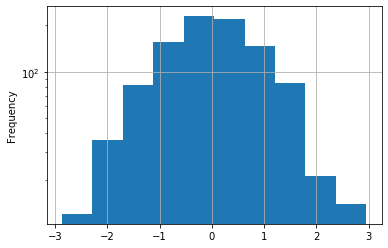

In [127]:
df.b.plot(kind='hist', logy=True, grid=True);

In [51]:
pd.to_datetime(1434340848, unit='s')

Timestamp('2015-06-15 04:00:48')

In [81]:
df.loc[(df.a < -1) & (df.b > 1), 'c']

31   -0.573576
35    0.318506
88    0.095291
Name: c, dtype: float64

In [105]:
import scipy

In [132]:
scipy.stats.shapiro(df)

(0.9995960593223572, 0.8290085792541504)

In [131]:
scipy.stats.normaltest(df)

NormaltestResult(statistic=array([4.10452135, 0.76544463, 1.78599902]), pvalue=array([0.1284442 , 0.68200226, 0.40942583]))

In [172]:
scipy.stats.ttest_ind(df.a[:500], df.a[500:])

Ttest_indResult(statistic=-0.00378764875375555, pvalue=0.9969786577148051)

In [194]:
df['d'] = df.a + 0.1 * abs(df.b)
df

,a,b,c,d
0,0.029219,-2.903424,-0.500705,0.319561
1,-0.581401,-0.691049,0.618647,-0.512296
2,1.048681,-1.142982,0.863099,1.162979
3,-0.674633,0.932612,-0.234586,-0.581372
4,-0.226700,0.619903,0.233450,-0.164710
...,...,...,...,...
995,-0.810591,-1.918957,0.458101,-0.618696
996,0.230917,1.234558,-1.935713,0.354372
997,-0.606310,-2.342535,-0.613960,-0.372057
998,0.238668,0.246697,-0.116900,0.263338


In [195]:
scipy.stats.ttest_rel(df['a'], df['d'])

Ttest_relResult(statistic=-41.670442565038016, pvalue=9.760891545699535e-221)

In [198]:
np.mgrid[-3:3:7j, -3:3:7j]

array([[[-3., -3., -3., -3., -3., -3., -3.],
        [-2., -2., -2., -2., -2., -2., -2.],
        [-1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.,  3.,  3.]],

       [[-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.]]])

In [205]:
arr = np.arange(6)
arr.resize(2, 3)
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [206]:
df['e'] = df['d'] / 0
df

,a,b,c,d,e
0,0.029219,-2.903424,-0.500705,0.319561,inf
1,-0.581401,-0.691049,0.618647,-0.512296,-inf
2,1.048681,-1.142982,0.863099,1.162979,inf
3,-0.674633,0.932612,-0.234586,-0.581372,-inf
4,-0.226700,0.619903,0.233450,-0.164710,-inf
...,...,...,...,...,...
995,-0.810591,-1.918957,0.458101,-0.618696,-inf
996,0.230917,1.234558,-1.935713,0.354372,inf
997,-0.606310,-2.342535,-0.613960,-0.372057,-inf
998,0.238668,0.246697,-0.116900,0.263338,inf


In [211]:
np.random.randint(0, 10, size=100)

array([8, 3, 0, 5, 1, 6, 5, 3, 6, 6, 3, 0, 7, 2, 6, 7, 1, 7, 0, 7, 2, 7,
       1, 2, 3, 8, 3, 3, 1, 0, 0, 1, 4, 3, 8, 9, 9, 6, 5, 8, 6, 0, 8, 0,
       8, 2, 9, 6, 0, 0, 6, 3, 4, 8, 2, 2, 4, 5, 3, 2, 9, 5, 7, 0, 4, 7,
       9, 6, 0, 9, 8, 2, 3, 8, 2, 1, 1, 4, 9, 5, 7, 1, 5, 7, 5, 7, 2, 0,
       8, 1, 7, 6, 6, 5, 2, 0, 1, 0, 9, 5])

In [7]:
from tqdm import tqdm
import time

pbar = tqdm(["a","b","c","d", "e", "f", "g"])
for c in pbar:
    if c == 'c':
        time.sleep(1.5)
    time.sleep(0.5)
    pbar.set_description("Processing %s"%c)

Processing g: 100%|██████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.38it/s]


In [4]:
from tqdm.notebook import tqdm
import time

#totalParameter установка общей длины индикатора выполнения
with tqdm(total=100) as pbar:
  for i in range(100):
    time.sleep(0.05)
    # Обновлять длину индикатора выполнения каждый раз
    pbar.update(1)

In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

df = pd.DataFrame(np.random.randint(0, 100, (10000000, 6)))

# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
# (can use `tqdm.gui.tqdm`, `tqdm.notebook.tqdm`, optional kwargs, etc.)
# tqdm.pandas(desc="my bar!")
tqdm.pandas()

# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
df.progress_apply(lambda x: x**2)
# can also groupby:
# df.groupby(0).progress_apply(lambda x: x**2)

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


,0,1,2,3,4,5
0,6561,6561,961,5041,64,2500
1,4624,7225,4,1156,7396,1024
2,1296,7744,5184,0,2304,8464
3,5929,5776,1849,7225,8464,1225
4,9,6561,49,8100,441,121
...,...,...,...,...,...,...
9999995,7921,36,100,676,441,3844
9999996,9216,7056,5184,441,2500,484
9999997,4356,256,196,2916,4356,0
9999998,361,2025,324,36,4096,9604


In [3]:
from tqdm.notebook import trange, tqdm
from time import sleep

for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop'):
        sleep(0.01)

In [5]:
pd.DataFrame(np.random.randint(0, 11, (3, 3)), columns=list('ABC'))

,A,B,C
0,4,1,4
1,5,1,4
2,9,7,2


In [14]:
df = pd.DataFrame({'gender': np.random.choice(['m', 'f'], size=50), 'math_score': np.random.randint(0, 101, 50)})
df

,gender,math_score
0,f,61
1,f,63
2,f,52
3,f,67
4,m,92
5,m,19
6,m,74
7,f,3
8,m,98
9,m,40


In [18]:
df.sort_values(['gender','math_score'], ascending=[True, False])\
    .groupby('gender')\
    .head(5)

,gender,math_score
44,f,97
49,f,96
10,f,93
18,f,90
20,f,89
16,m,100
8,m,98
21,m,98
26,m,94
4,m,92


In [21]:
df.values.nbytes

800

In [26]:
np.random.seed(42)

In [27]:
np.random.randint(0, 10, 4)

array([6, 3, 7, 4])

In [28]:
np.random.randint(0, 10, 4)

array([6, 9, 2, 6])

In [29]:
np.random.seed(42)

In [30]:
np.random.randint(0, 10, 4)

array([6, 3, 7, 4])

In [31]:
np.random.randint(0, 10, 4)

array([6, 9, 2, 6])

In [33]:
rng = np.random.RandomState(42)

In [34]:
rng.randint(0, 10, 4)

array([6, 3, 7, 4])

In [35]:
rng.randint(0, 10, 4)

array([6, 9, 2, 6])

In [36]:
rng = np.random.RandomState(42)

In [37]:
rng.randint(0, 10, 4)

array([6, 3, 7, 4])

In [38]:
rng.randint(0, 10, 4)

array([6, 9, 2, 6])

In [33]:
df = pd.DataFrame(np.random.randint(0, 100, (10000, 100)))

In [4]:
from tqdm import tqdm
tqdm.pandas()

In [35]:
df.progress_applymap(lambda x: np.sin(x))
# progress_map()

100%|████████████████████████████| 1000000/1000000 [00:04<00:00, 209149.29it/s]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.992873,-0.536573,0.017702,0.670229,0.920026,-0.026551,0.296369,-0.905578,0.412118,-0.966118,...,0.963795,0.893997,0.901788,0.762558,0.999912,-0.544021,-0.245252,0.656987,-0.676772,0.986628
1,-0.132352,0.017702,-0.750987,-0.993889,-0.756802,0.656987,0.436165,0.551427,-0.993889,-0.916522,...,0.656987,-0.831775,-0.676772,-0.905578,0.989358,-0.428183,0.436165,0.999520,0.412118,0.992873
2,-0.905578,-0.831775,0.986628,0.395925,0.296369,-0.558789,-0.821818,0.395925,-0.404038,0.762558,...,0.733190,0.826829,0.989358,-0.304811,0.826829,-0.176076,-0.643538,0.968364,0.149877,-0.756802
3,-0.444113,-0.245252,0.513978,-0.821818,0.745113,0.990607,0.920026,0.566108,0.850904,-0.905578,...,0.105988,0.270906,0.395925,0.983588,-0.923458,-0.158623,0.551427,0.270906,-0.245252,0.826829
4,0.986628,-0.287903,0.513978,-0.750987,-0.428183,-0.855520,-0.026551,-0.176076,-0.026551,0.656987,...,-0.768255,-0.905578,-0.961397,-0.821818,-0.245252,-0.132352,-0.287903,-0.573382,0.773891,0.860069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.132352,0.149877,0.683262,-0.008851,0.035398,-0.521551,-0.999990,-0.663634,0.990607,0.105988,...,-0.966118,-0.404038,0.650288,0.529083,-0.387782,-0.855520,-0.643538,-0.916522,-0.158623,0.745113
9996,0.912945,-0.750987,0.412118,0.636738,-0.993889,-0.279415,-0.676772,-0.404038,-0.739181,-0.404038,...,0.893997,-0.245252,-0.114785,-0.629888,-0.026551,-0.544021,-0.831775,-0.846220,0.253823,-0.953753
9997,-0.916522,-0.988032,-0.663634,-0.831775,0.999520,0.893997,-0.262375,-0.629888,-0.988032,-0.988032,...,0.000000,-0.132352,0.566108,-0.387782,-0.821818,0.920026,-0.663634,-0.750987,0.951055,0.566108
9998,0.762558,-0.629888,-0.279415,0.017702,-0.676772,-0.132352,0.035398,-0.573382,0.836656,0.841471,...,-0.262375,-0.521551,-0.287903,0.956376,0.893997,0.683262,-0.988032,-0.008851,0.270906,0.745113


In [31]:
df[0].progress_map(lambda x: np.sin(x))

100%|████████████████████████████████| 10000/10000 [00:00<00:00, 161280.93it/s]


0       0.683262
1      -0.923458
2      -0.999755
3      -0.387782
4      -0.993889
          ...   
9995   -0.993889
9996   -0.026551
9997    0.683262
9998   -0.905578
9999   -0.026551
Name: 0, Length: 10000, dtype: float64

In [3]:
dti = pd.to_datetime(
    ["1/1/2018", np.datetime64("2018-01-01")]
)

In [11]:
dti[0]

Timestamp('2018-01-01 00:00:00')

In [7]:
dti[0].day_name()

'Monday'

In [47]:
data = pd.Timestamp("1972-04-15")

In [19]:
data.day_name()

'Saturday'

In [50]:
data.weekday()

5

In [20]:
data.month_name()

'April'

In [21]:
data.year

1972

In [22]:
data.month

4

In [23]:
data.week

15

In [24]:
data.day

15

In [38]:
data + pd.Timedelta("1 day")

Timestamp('1972-04-16 00:00:00')

In [46]:
data + pd.Timedelta(seconds=1)

Timestamp('1972-04-15 00:00:01')

In [6]:
df = pd.DataFrame(np.random.randint(1, 10, 40))
df['cut'] = pd.cut(df[0], (2, 5, 7))

In [7]:
df

,0,cut
0,7,"(5.0, 7.0]"
1,1,NaN
2,7,"(5.0, 7.0]"
3,3,"(2.0, 5.0]"
4,4,"(2.0, 5.0]"
5,6,"(5.0, 7.0]"
6,8,NaN
7,5,"(2.0, 5.0]"
8,2,NaN
9,9,NaN


In [9]:
pd.cut(df[0], 3)[:10]
# а почему такое странное деление с границей на 0.992?

0      (6.333, 9.0]
1    (0.992, 3.667]
2      (6.333, 9.0]
3    (0.992, 3.667]
4    (3.667, 6.333]
5    (3.667, 6.333]
6      (6.333, 9.0]
7    (3.667, 6.333]
8    (0.992, 3.667]
9      (6.333, 9.0]
Name: 0, dtype: category
Categories (3, interval[float64]): [(0.992, 3.667] < (3.667, 6.333] < (6.333, 9.0]]

In [3]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
arr2 = arr[-3:]
arr2[:] = 10
arr2

array([10, 10, 10])

In [6]:
arr  # исходный массив меняется!

array([ 0,  1,  2,  3,  4,  5,  6, 10, 10, 10])

In [9]:
arr = np.arange(10)
arr2 = arr[arr > 6]
arr2[:] = 10
arr  # маскиролание создает копию

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
arr = np.arange(10)
arr2 = arr[[7, 8, 9]]
arr2[:] = 10
arr  # прихотливая индексация тоже создает копию

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
arr = np.random.randint(15, 45, (5, 5))
arr

array([[26, 16, 19, 42, 42],
       [16, 38, 17, 24, 40],
       [24, 28, 41, 43, 23],
       [20, 27, 30, 29, 17],
       [44, 35, 22, 31, 42]])

In [46]:
(arr < 20) + (arr > 40)

array([[False,  True,  True,  True,  True],
       [ True, False,  True, False, False],
       [False, False,  True,  True, False],
       [False, False, False, False,  True],
       [ True, False, False, False,  True]])

In [47]:
arr < 20

array([[False,  True,  True, False, False],
       [ True, False,  True, False, False],
       [False, False, False, False, False],
       [False, False, False, False,  True],
       [False, False, False, False, False]])

In [48]:
(arr > 40)

array([[False, False, False,  True,  True],
       [False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False, False, False, False],
       [ True, False, False, False,  True]])

In [50]:
mask = np.array([[True if i == j else False for i in range(5)] for j in range(5)])

In [51]:
arr[mask]

array([26, 38, 41, 29, 42])

In [52]:
arr[[range(5)], [range(5)]]  # прихотливая индексация

array([[26, 38, 41, 29, 42]])

In [54]:
i = np.array([*range(5)])
arr[i, i]

array([26, 38, 41, 29, 42])

In [52]:
df = pd.DataFrame(np.ones((5, 3)), dtype=int, index=list('abcde'), columns=list('ABC'))
df

,A,B,C
a,1,1,1
b,1,1,1
c,1,1,1
d,1,1,1
e,1,1,1


In [20]:
df2 = pd.DataFrame(3 * np.ones((3, 5)), dtype=int, index=list('abc'), columns=list('ABCDE'))
df2

,A,B,C,D,E
a,3,3,3,3,3
b,3,3,3,3,3
c,3,3,3,3,3


In [53]:
df + df.A

,A,B,C,a,b,c,d,e
a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df[['A']]

,A
a,1
b,1
c,1
d,1
e,1


In [46]:
df + df[['A']]

,A,B,C
a,2,NaN,NaN
b,2,NaN,NaN
c,2,NaN,NaN
d,2,NaN,NaN
e,2,NaN,NaN


In [45]:
df[['B', 'C']] + df[['A']]

,A,B,C
a,NaN,NaN,NaN
b,NaN,NaN,NaN
c,NaN,NaN,NaN
d,NaN,NaN,NaN
e,NaN,NaN,NaN


In [14]:
df * df[['A']]

,A,B,C
a,1,NaN,NaN
b,1,NaN,NaN
c,1,NaN,NaN
d,1,NaN,NaN
e,1,NaN,NaN


In [13]:
df.loc['a']

A    1
B    1
C    1
Name: a, dtype: int32

In [10]:
df + df.loc['a']

,A,B,C
a,2,2,2
b,2,2,2
c,2,2,2
d,2,2,2
e,2,2,2


In [48]:
df + df.iloc[0]

,A,B,C
a,2,2,2
b,2,2,2
c,2,2,2
d,2,2,2
e,2,2,2


In [17]:
df * df.loc['a']

,A,B,C
a,1,1,1
b,1,1,1
c,1,1,1
d,1,1,1
e,1,1,1


In [54]:
df.loc[['a']]

,A,B,C
a,1,1,1


In [55]:
df * df.loc[['a']]

,A,B,C
a,1.0,1.0,1.0
b,NaN,NaN,NaN
c,NaN,NaN,NaN
d,NaN,NaN,NaN
e,NaN,NaN,NaN


In [18]:
df[['A']] + df.loc['a']

,A,B,C
a,2,NaN,NaN
b,2,NaN,NaN
c,2,NaN,NaN
d,2,NaN,NaN
e,2,NaN,NaN


In [19]:
df[['A']].values + df.loc['a'].values

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

In [21]:
df + df2

,A,B,C,D,E
a,4.0,4.0,4.0,NaN,NaN
b,4.0,4.0,4.0,NaN,NaN
c,4.0,4.0,4.0,NaN,NaN
d,NaN,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN,NaN


In [24]:
df * df2

,A,B,C,D,E
a,3.0,3.0,3.0,NaN,NaN
b,3.0,3.0,3.0,NaN,NaN
c,3.0,3.0,3.0,NaN,NaN
d,NaN,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN,NaN


In [28]:
df.add(df2, fill_value=0)

,A,B,C,D,E
a,4.0,4.0,4.0,3.0,3.0
b,4.0,4.0,4.0,3.0,3.0
c,4.0,4.0,4.0,3.0,3.0
d,1.0,1.0,1.0,NaN,NaN
e,1.0,1.0,1.0,NaN,NaN


In [60]:
df3 = pd.DataFrame(np.arange(1, 16).reshape(5, 3), dtype=int, index=list('abcde'), columns=list('ABC'))
df3

,A,B,C
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12
e,13,14,15


In [61]:
df3[['B', 'C']] = df3[['B', 'C']].values - df3[['A']].values

In [62]:
df3

,A,B,C
a,1,1,2
b,4,1,2
c,7,1,2
d,10,1,2
e,13,1,2


In [4]:
df = pd.DataFrame(np.random.randint(0, 27, (9, 3)), columns=list('ABC'))
df

,A,B,C
0,2,11,15
1,20,14,3
2,18,14,18
3,10,0,10
4,21,17,0
5,8,7,21
6,0,4,15
7,11,9,20
8,10,16,10


In [13]:
np.partition(df.values, 4, axis=0)

array([[ 8,  0,  3],
       [ 2,  4,  0],
       [ 0,  7, 10],
       [10,  9, 10],
       [10, 11, 15],
       [11, 14, 15],
       [18, 14, 21],
       [20, 16, 20],
       [21, 17, 18]])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       9 non-null      int32
 1   B       9 non-null      int32
 2   C       9 non-null      int32
dtypes: int32(3)
memory usage: 236.0 bytes


In [19]:
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [20]:
np.arange(0, 2.1, 0.25)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [7]:
df = pd.DataFrame(np.arange(56).reshape(7, 8))
df

,0,1,2,3,4,5,6,7
0,0,1,2,3,4,5,6,7
1,8,9,10,11,12,13,14,15
2,16,17,18,19,20,21,22,23
3,24,25,26,27,28,29,30,31
4,32,33,34,35,36,37,38,39
5,40,41,42,43,44,45,46,47
6,48,49,50,51,52,53,54,55


In [14]:
df1 = df[2:4]

In [15]:
df1

,0,1,2,3,4,5,6,7
2,16,17,18,19,20,21,22,23
3,24,25,26,27,28,29,30,31


In [17]:
df1.loc[:, :] = 7

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df1

,0,1,2,3,4,5,6,7
2,7,7,7,7,7,7,7,7
3,7,7,7,7,7,7,7,7


In [19]:
df

,0,1,2,3,4,5,6,7
0,0,1,2,3,4,5,6,7
1,8,9,10,11,12,13,14,15
2,7,7,7,7,7,7,7,7
3,7,7,7,7,7,7,7,7
4,32,33,34,35,36,37,38,39
5,40,41,42,43,44,45,46,47
6,48,49,50,51,52,53,54,55


In [25]:
df = pd.DataFrame(np.arange(56).reshape(7, 8))
df

,0,1,2,3,4,5,6,7
0,0,1,2,3,4,5,6,7
1,8,9,10,11,12,13,14,15
2,16,17,18,19,20,21,22,23
3,24,25,26,27,28,29,30,31
4,32,33,34,35,36,37,38,39
5,40,41,42,43,44,45,46,47
6,48,49,50,51,52,53,54,55


In [26]:
df1 = df.iloc[:, 4:6]

In [27]:
df1.iloc[:, :] = 999
df1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,4,5
0,999,999
1,999,999
2,999,999
3,999,999
4,999,999
5,999,999
6,999,999


In [28]:
df

,0,1,2,3,4,5,6,7
0,0,1,2,3,999,999,6,7
1,8,9,10,11,999,999,14,15
2,16,17,18,19,999,999,22,23
3,24,25,26,27,999,999,30,31
4,32,33,34,35,999,999,38,39
5,40,41,42,43,999,999,46,47
6,48,49,50,51,999,999,54,55


In [30]:
arr = np.arange(56)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])

In [31]:
arr.reshape(7, 8)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55]])

In [32]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])

In [33]:
arr2 = arr.reshape(7, 8)
arr2

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55]])

In [34]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])

In [35]:
arr3 = arr.reshape(7, -1)
arr3

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55]])

In [36]:
arr3 = arr.reshape(-1, 4)
arr3

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31],
       [32, 33, 34, 35],
       [36, 37, 38, 39],
       [40, 41, 42, 43],
       [44, 45, 46, 47],
       [48, 49, 50, 51],
       [52, 53, 54, 55]])

In [7]:
m1 = np.array([10, 5, 6, -8])

In [8]:
m2 = np.array([-5, 9, -3, 4])

In [11]:
np.abs(np.minimum(m1, m2))

array([5, 5, 3, 8])

In [15]:
arr = np.array(np.random.randint(10, 100, 27)).reshape(3, 3, 3)

In [16]:
arr

array([[[64, 79, 58],
        [88, 45, 43],
        [11, 62, 68]],

       [[15, 95, 16],
        [80, 49, 61],
        [55, 66, 16]],

       [[65, 85, 89],
        [56, 39, 55],
        [37, 19, 25]]])

In [18]:
arr.sort(axis=1)

In [19]:
arr

array([[[11, 45, 43],
        [64, 62, 58],
        [88, 79, 68]],

       [[15, 49, 16],
        [55, 66, 16],
        [80, 95, 61]],

       [[37, 19, 25],
        [56, 39, 55],
        [65, 85, 89]]])

In [20]:
arr.sort(axis=(1, 2))

TypeError: an integer is required (got type tuple)

In [21]:
arr.sum(axis=(1, 2))

array([518, 453, 470])

In [15]:
arr = np.array(np.random.randint(0, 10, 6))

In [16]:
arr

array([9, 8, 2, 1, 6, 4])

In [17]:
np.in1d(arr, [5, 6, 8])

array([False,  True, False, False,  True, False])

In [18]:
np.isin(arr, [5, 6, 8])

array([False,  True, False, False,  True, False])

In [19]:
arr = arr.reshape(2, 3)
arr

array([[9, 8, 2],
       [1, 6, 4]])

In [20]:
np.isin(arr, [5, 6, 8])

array([[False,  True, False],
       [False,  True, False]])

In [25]:
arr[np.isin(arr, [5, 6, 8])]

array([8, 6])

In [23]:
np.in1d(arr, [5, 6, 8])

array([False,  True, False, False,  True, False])

In [24]:
np.all(arr < 8, axis=0)

array([False, False,  True])

In [4]:
def f(iks, listik):
    iks = 6
    listik = listik + [6]

x = 5
lst = [4, 5]
f(x, lst)
print(x)
print(lst)

5
[4, 5]


In [4]:
s = pd.Series([1, 5, 12], index=['a', 'b', 'c'])
s

a     1
b     5
c    12
dtype: int64

In [8]:
s['c']

12

In [18]:
s = pd.Series([1, 5, 12], index=[3, 2, 4])
s

3     1
2     5
4    12
dtype: int64

In [21]:
s[2]

5

In [25]:
s = pd.Series([1, 5, 12], index=[1.1, 0.1, 2.1])
s

1.1     1
0.1     5
2.1    12
dtype: int64

In [27]:
s[0.1]

5

In [28]:
s[::-1]

2.1    12
0.1     5
1.1     1
dtype: int64

In [39]:
s = pd.Series([1, 5, 12])
s

0     1
1     5
2    12
dtype: int64

In [40]:
s2 = s[::-1].copy()
s2

2    12
1     5
0     1
dtype: int64

In [41]:
s == s2

ValueError: Can only compare identically-labeled Series objects

In [42]:
s2 = s2.sort_index()
s2

0     1
1     5
2    12
dtype: int64

In [38]:
s == s2

0    True
1    True
2    True
dtype: bool

In [24]:
s1 = pd.Series([1, 2, 3], list('ABC'))
s1

A    1
B    2
C    3
dtype: int64

In [25]:
s1.name = 'col1'
s1.index.name = 'idx'
s1

idx
A    1
B    2
C    3
Name: col1, dtype: int64

In [26]:
s2 = pd.Series([1, 2, 3], list('BCD'))
s2.name = 'col2'
s2.index.name = 'idx'
s2

idx
B    1
C    2
D    3
Name: col2, dtype: int64

In [27]:
[s1, s2]

[idx
 A    1
 B    2
 C    3
 Name: col1, dtype: int64,
 idx
 B    1
 C    2
 D    3
 Name: col2, dtype: int64]

In [28]:
pd.DataFrame([s1, s2])

idx,A,B,C,D
col1,1.0,2.0,3.0,NaN
col2,NaN,1.0,2.0,3.0


In [29]:
pd.DataFrame(dict(s1 = s1, s2 = s2))

,s1,s2
idx,,
A,1.0,NaN
B,2.0,1.0
C,3.0,2.0
D,NaN,3.0


In [30]:
pd.concat((pd.DataFrame(s1), pd.DataFrame(s2)), axis=1)

,col1,col2
idx,,
A,1.0,NaN
B,2.0,1.0
C,3.0,2.0
D,NaN,3.0


In [31]:
s2.index.name = 'idxs'

In [32]:
pd.concat((pd.DataFrame(s1), pd.DataFrame(s2)), axis=1)

,col1,col2
A,1.0,NaN
B,2.0,1.0
C,3.0,2.0
D,NaN,3.0


In [33]:
s3 = pd.Series([1, 2, 3], list('BCD'))
s3.index.name = 'idx'
s3

idx
B    1
C    2
D    3
dtype: int64

In [34]:
pd.concat((pd.DataFrame(s1), pd.DataFrame(s3)), axis=1)

,col1,0
idx,,
A,1.0,NaN
B,2.0,1.0
C,3.0,2.0
D,NaN,3.0


In [35]:
pd.concat((s1, s2, s3), axis=1)

,col1,col2,0
A,1.0,NaN,NaN
B,2.0,1.0,1.0
C,3.0,2.0,2.0
D,NaN,3.0,3.0


In [2]:
df = pd.DataFrame({'gender': np.random.choice(['m', 'f'], size=10), 'math_score': np.random.randint(0, 101, 10)})
df

,gender,math_score
0,m,32
1,m,78
2,m,30
3,m,59
4,m,30
5,f,97
6,m,57
7,m,69
8,f,76
9,f,76


In [3]:
df['new'] = range(10)
df

,gender,math_score,new
0,m,32,0
1,m,78,1
2,m,30,2
3,m,59,3
4,m,30,4
5,f,97,5
6,m,57,6
7,m,69,7
8,f,76,8
9,f,76,9


In [4]:
df.loc[10] = ['f', 54, 10]
df

,gender,math_score,new
0,m,32,0
1,m,78,1
2,m,30,2
3,m,59,3
4,m,30,4
5,f,97,5
6,m,57,6
7,m,69,7
8,f,76,8
9,f,76,9


diamonds - цена алмазов в зависимости от параметров  
iris - сорт ирисов и их характеристики  
penguins - виды пингвинов и их характеристики  
taxis - данные по поездкам такси  
tips - чаевые и характеристики посетителей  
titanic - судьба пассажиров и их характеристики

In [39]:
df = sns.load_dataset('titanic')
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
55,1,1,male,NaN,0,0,35.5000,S,First,man,True,C,Southampton,yes,True
342,0,2,male,28.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
555,0,1,male,62.0,0,0,26.5500,S,First,man,True,NaN,Southampton,no,True
508,0,3,male,28.0,0,0,22.5250,S,Third,man,True,NaN,Southampton,no,True
447,1,1,male,34.0,0,0,26.5500,S,First,man,True,NaN,Southampton,yes,True
495,0,3,male,NaN,0,0,14.4583,C,Third,man,True,NaN,Cherbourg,no,True
624,0,3,male,21.0,0,0,16.1000,S,Third,man,True,NaN,Southampton,no,True
395,0,3,male,22.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,no,True
802,1,1,male,11.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
236,0,2,male,44.0,1,0,26.0000,S,Second,man,True,NaN,Southampton,no,False


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
df.describe(include=np.object)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,152,168,168


In [2]:
df = pd.DataFrame(np.arange(16).reshape((4, 4)), 
                  index=['Moscow', 'Vladivostok', 'Ufa', 'Kazan'], 
                  columns=['col_1', 'col_2', 'col_3', 'col_4']
                 )
df

,col_1,col_2,col_3,col_4
Moscow,0,1,2,3
Vladivostok,4,5,6,7
Ufa,8,9,10,11
Kazan,12,13,14,15


In [9]:
df[['col_1':'col_3']]

SyntaxError: invalid syntax (Temp/ipykernel_2220/2554143777.py, line 1)

In [6]:
df[0:1]

,col_1,col_2,col_3,col_4
Moscow,0,1,2,3


In [7]:
df['col_1']

Moscow          0
Vladivostok     4
Ufa             8
Kazan          12
Name: col_1, dtype: int32

In [8]:
df[df > 10]

,col_1,col_2,col_3,col_4
Moscow,NaN,NaN,NaN,NaN
Vladivostok,NaN,NaN,NaN,NaN
Ufa,NaN,NaN,NaN,11.0
Kazan,12.0,13.0,14.0,15.0


In [3]:
arr = df.values
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [4]:
arr2 = arr.transpose()
arr2

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [6]:
arr2[1, 2] = 0
arr2

array([[ 0,  4,  8, 12],
       [ 1,  5,  0, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [8]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  0, 10, 11],
       [12, 13, 14, 15]])

In [9]:
arr3 = arr.transpose().copy()
arr3

array([[ 0,  4,  8, 12],
       [ 1,  5,  0, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [10]:
arr3[2, 1] = 0
arr3

array([[ 0,  4,  8, 12],
       [ 1,  5,  0, 13],
       [ 2,  0, 10, 14],
       [ 3,  7, 11, 15]])

In [11]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  0, 10, 11],
       [12, 13, 14, 15]])

In [8]:
arr = np.arange(10, dtype=int)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
arr.dtype

dtype('int32')

In [10]:
arr[-1] = np.nan
arr

ValueError: cannot convert float NaN to integer

In [16]:
df = pd.DataFrame(np.arange(1, 10).reshape(3, 3), columns=list('ABC'))
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [19]:
df = pd.DataFrame(np.arange(1, 10).reshape(3, 3), columns=list('ABC'))
df.loc[1, 'A'] = 0.0
df

,A,B,C
0,1,2,3
1,0,5,6
2,7,8,9


In [31]:
df = pd.DataFrame(np.arange(1, 10).reshape(3, 3), columns=list('ABC'))
df.loc[1, 'A'] = '123'
type(df.loc[1, 'A'])

str

In [29]:
df = pd.DataFrame(np.arange(1, 10).reshape(3, 3), columns=list('ABC'))
df.at[1, 'A'] = '123'
type(df.loc[1, 'A'])

numpy.int32

In [33]:
pd.timedelta_range('0:00:00', '9:00:00', freq='H')[0]

Timedelta('0 days 00:00:00')

In [59]:
pd.timedelta_range('0d 00:00:00', '2d 00:00:00', freq='12.5H')

TimedeltaIndex(['0 days 00:00:00', '0 days 12:30:00', '1 days 01:00:00',
                '1 days 13:30:00'],
               dtype='timedelta64[ns]', freq='750T')

In [53]:
pd.to_datetime('2022-10-10') + pd.timedelta_range('0d 00:00:00', '2d 00:00:00', freq='6H')

DatetimeIndex(['2022-10-10 00:00:00', '2022-10-10 06:00:00',
               '2022-10-10 12:00:00', '2022-10-10 18:00:00',
               '2022-10-11 00:00:00', '2022-10-11 06:00:00',
               '2022-10-11 12:00:00', '2022-10-11 18:00:00',
               '2022-10-12 00:00:00'],
              dtype='datetime64[ns]', freq='6H')

In [34]:
pd.date_range('2022-10-10', periods=5, freq='Min')[0]

Timestamp('2022-10-10 00:00:00', freq='T')

In [38]:
pd.date_range('2022-10-10', '2022-10-15')

DatetimeIndex(['2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13',
               '2022-10-14', '2022-10-15'],
              dtype='datetime64[ns]', freq='D')

In [50]:
pd.period_range('2022-10-10', periods=5, freq='Min')[0]

Period('2022-10-10 00:00', 'T')

In [57]:
pd.period_range('2022-10-10', '2022-10-12', freq='927Min')

PeriodIndex(['2022-10-10 00:00', '2022-10-10 15:27', '2022-10-11 06:54',
             '2022-10-11 22:21'],
            dtype='period[927T]', freq='927T')

In [4]:
import random
itr = [random.randint(0, 10) for _ in range(100)]

In [5]:
import collections
c = collections.Counter(itr)

In [16]:
c.most_common()[:5]

[(0, 13), (8, 12), (9, 11), (3, 10), (6, 9)]

In [12]:
c.most_common()[:-5:-1]

[(10, 6), (7, 6), (1, 7), (4, 8)]

In [34]:
s1 = pd.Series(np.random.randint(0, 9, 10))
s1[0] = np.nan
s1

0    NaN
1    3.0
2    0.0
3    7.0
4    8.0
5    2.0
6    8.0
7    3.0
8    1.0
9    3.0
dtype: float64

In [35]:
s2 = pd.Series(np.random.randint(0, 9, 10))
s2[9] = np.nan
s2

0    4.0
1    2.0
2    4.0
3    6.0
4    1.0
5    8.0
6    4.0
7    7.0
8    8.0
9    NaN
dtype: float64

In [36]:
s1.add(s2, fill_value=0)

0     4.0
1     5.0
2     4.0
3    13.0
4     9.0
5    10.0
6    12.0
7    10.0
8     9.0
9     3.0
dtype: float64

In [40]:
df2 = s2.to_frame()
df2

,0
0,4.0
1,2.0
2,4.0
3,6.0
4,1.0
5,8.0
6,4.0
7,7.0
8,8.0
9,NaN


In [41]:
df2.loc[-1] = 5
df2

,0
0,4.0
1,2.0
2,4.0
3,6.0
4,1.0
5,8.0
6,4.0
7,7.0
8,8.0
9,NaN


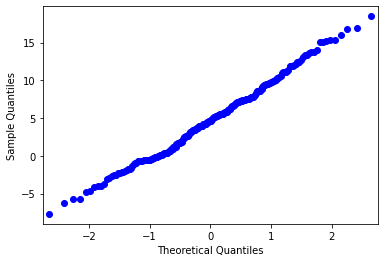

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

a = np.random.normal(5, 5, 250)
sm.qqplot(a)
plt.show()

In [58]:
df = pd.DataFrame(['2012-11-05 0:12:36', '3/12/2012', '5 oct 2012'], columns=['date'])
df

,date
0,2012-11-05 0:12:36
1,3/12/2012
2,5 oct 2012


In [60]:
df.date = pd.to_datetime(df.date)
df

,date
0,2012-11-05 00:12:36
1,2012-03-12 00:00:00
2,2012-10-05 00:00:00


In [76]:
df.date[1].date()

datetime.date(2012, 3, 12)

In [77]:
df.date[1].dt.date()

AttributeError: 'Timestamp' object has no attribute 'dt'

In [82]:
df.date.date

AttributeError: 'Series' object has no attribute 'date'

In [81]:
df['date'].dt.date

0    2012-11-05
1    2012-03-12
2    2012-10-05
Name: date, dtype: object

In [64]:
df.date[1]

Timestamp('2012-03-12 00:00:00')

In [65]:
quarters_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="q"))
quarters_series

0   2000-03-31
1   2000-06-30
2   2000-09-30
dtype: datetime64[ns]

In [67]:
quarters_series.dt.quarter

AttributeError: 'Series' object has no attribute 'quarter'

In [68]:
quarters = pd.date_range("2000-01-01", periods=3, freq="q")
quarters

DatetimeIndex(['2000-03-31', '2000-06-30', '2000-09-30'], dtype='datetime64[ns]', freq='Q-DEC')

In [74]:
quarters[1].date()

datetime.date(2000, 6, 30)

In [83]:
dct = {'a': 1, 'b': 2, 'c': 3}

In [84]:
[*dct.items()]

[('a', 1), ('b', 2), ('c', 3)]

In [85]:
[dct.items()]

[dict_items([('a', 1), ('b', 2), ('c', 3)])]

In [38]:
df = sns.load_dataset('taxis')
df.sample(10)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
238,2019-03-09 01:49:19,2019-03-09 01:54:17,1,1.50,6.5,2.55,0.0,12.85,yellow,credit card,SoHo,Flatiron,Manhattan,Manhattan
5385,2019-03-24 13:57:21,2019-03-24 14:19:29,1,6.16,20.5,0.00,0.0,21.30,yellow,credit card,East Harlem North,Kips Bay,Manhattan,Manhattan
87,2019-03-28 22:57:05,2019-03-28 23:16:56,1,4.10,16.0,0.00,0.0,19.80,yellow,cash,Hudson Sq,Lincoln Square East,Manhattan,Manhattan
3596,2019-03-09 16:42:52,2019-03-09 16:58:29,4,1.58,11.5,0.00,0.0,14.80,yellow,cash,Penn Station/Madison Sq West,Clinton East,Manhattan,Manhattan
728,2019-03-15 14:09:58,2019-03-15 14:28:28,4,2.57,13.5,0.00,0.0,16.80,yellow,cash,Clinton East,Greenwich Village North,Manhattan,Manhattan
4556,2019-03-21 14:33:58,2019-03-21 14:58:38,1,2.20,15.5,2.00,0.0,20.80,yellow,credit card,Union Sq,Midtown North,Manhattan,Manhattan
761,2019-03-22 15:16:17,2019-03-22 15:29:48,1,4.18,15.0,3.66,0.0,21.96,yellow,credit card,Lenox Hill East,Alphabet City,Manhattan,Manhattan
1633,2019-03-12 08:05:48,2019-03-12 08:12:25,6,1.07,6.5,1.46,0.0,8.76,yellow,credit card,Bloomingdale,Upper West Side North,Manhattan,Manhattan
121,2019-03-13 20:00:10,2019-03-13 20:14:34,1,2.10,11.0,3.05,0.0,18.35,yellow,credit card,East Chelsea,East Village,Manhattan,Manhattan
905,2019-03-23 00:19:20,2019-03-23 00:26:11,1,1.00,6.5,1.50,0.0,11.80,yellow,credit card,Midtown South,Midtown East,Manhattan,Manhattan


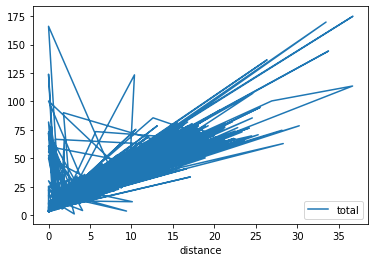

In [4]:
df.plot.line('distance', 'total');

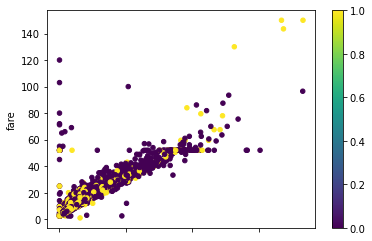

In [41]:
df.plot.scatter(x='distance', y='fare', c=(df.payment=='cash'), cmap="viridis");

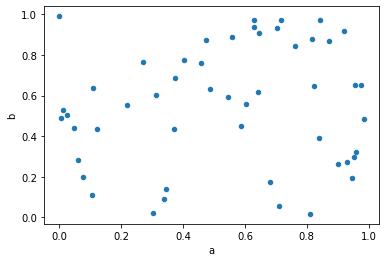

In [33]:
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])

df["species"] = pd.Categorical(
    ["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10
)


df.plot.scatter(x="a", y="b");

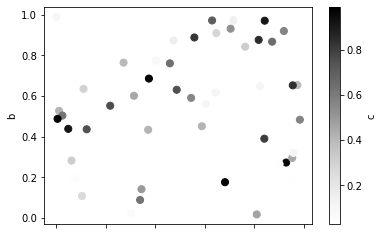

In [35]:
df.plot.scatter(x="a", y="b", c="c", s=50);

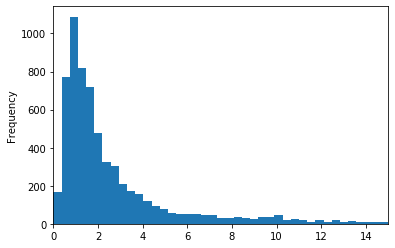

In [70]:
df.distance.plot.hist(bins=100, xlim=(0, 15));

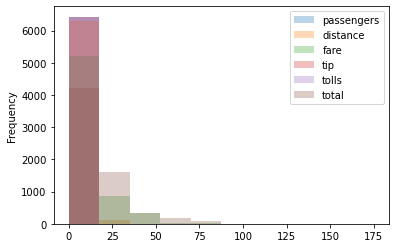

In [16]:
df.plot.hist(alpha=0.3);

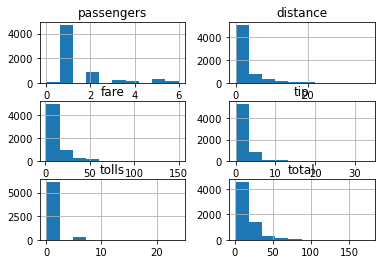

In [10]:
df.hist();

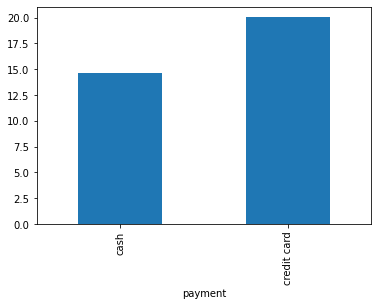

In [7]:
df.groupby('payment').total.agg('mean').plot.bar();  ## если не сгруппировать то каждый кэш и кредитка будут отдельными столбиками

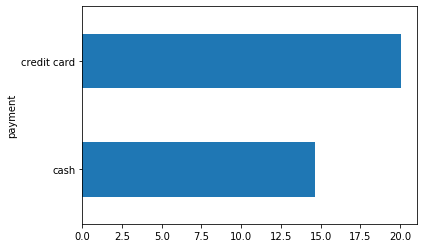

In [81]:
df.groupby('payment').total.agg('mean').plot.barh();

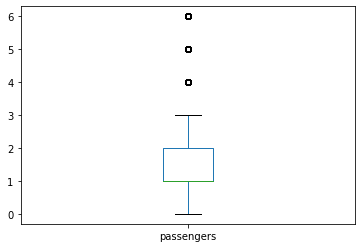

In [21]:
df.passengers.plot.box();

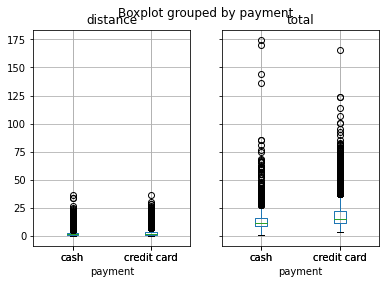

In [27]:
df.boxplot(column=['distance', 'total'], by='payment');

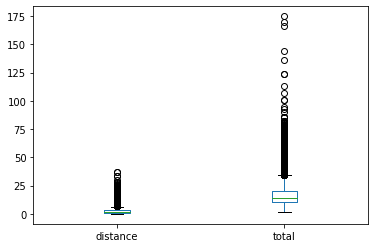

In [40]:
df[['distance', 'total']].plot.box(by='payment');  # почему не срабатывает by!?

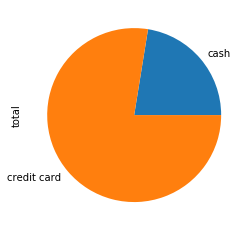

In [113]:
df.groupby('payment').total.agg('sum').plot.pie();  ## если заранее не сгруппировать то каждый кэш и кредитка будут отдельными секторами, похоже

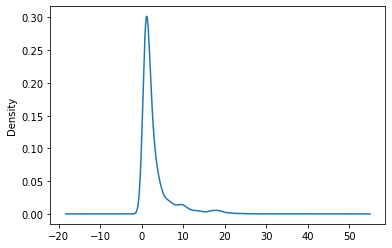

In [116]:
df.distance.plot.kde();  ## Kernel Density Estimation

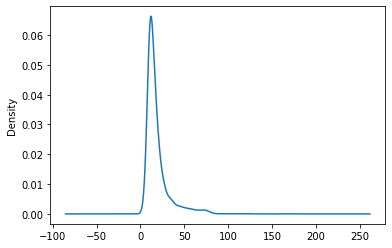

In [118]:
df.total.plot.kde();

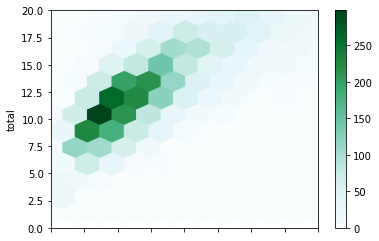

In [125]:
df.plot.hexbin('distance', 'total', xlim=(0,4), ylim=(0, 20));

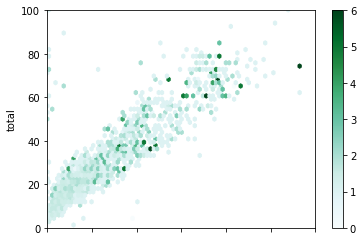

In [50]:
df.plot.hexbin('distance', 'total', C='passengers', xlim=(0, 30), ylim=(0, 100));

In [131]:
df2 = pd.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6],
    'signups': [5, 5, 6, 12, 14, 13],
    'visits': [20, 42, 28, 62, 81, 50],
}, index=pd.date_range(start='2018/01/01', end='2018/07/01',
                       freq='M'))
df2

,sales,signups,visits
2018-01-31,3,5,20
2018-02-28,2,5,42
2018-03-31,3,6,28
2018-04-30,9,12,62
2018-05-31,10,14,81
2018-06-30,6,13,50


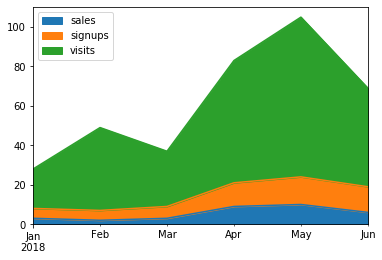

In [133]:
df2.plot.area();

In [134]:
df3 = pd.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6],
    'signups': [5, 5, 6, 12, 14, 13],
    'visits': [20, 42, 28, 62, 81, 50],
    'dates': pd.date_range(start='2018/01/01', end='2018/07/01', freq='M')})
df3

,sales,signups,visits,dates
0,3,5,20,2018-01-31
1,2,5,42,2018-02-28
2,3,6,28,2018-03-31
3,9,12,62,2018-04-30
4,10,14,81,2018-05-31
5,6,13,50,2018-06-30


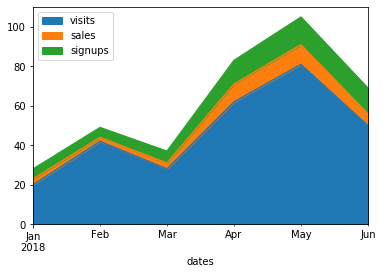

In [143]:
df3.plot.area('dates', ['visits', 'sales', 'signups']);

In [53]:
from pandas.plotting import scatter_matrix

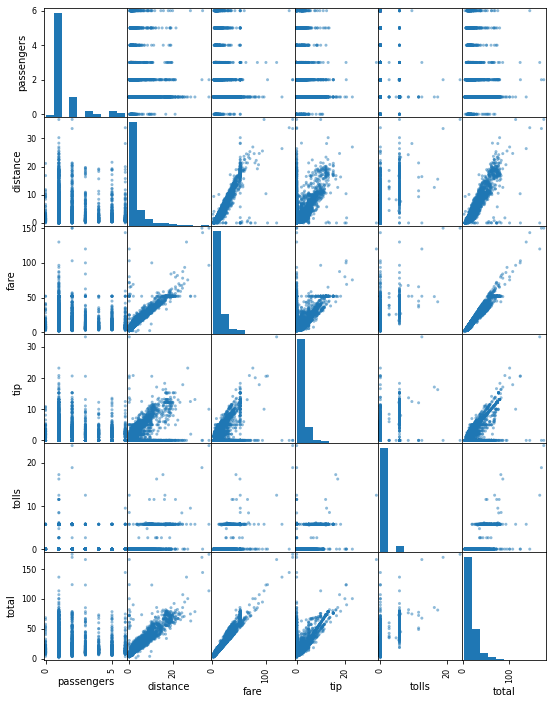

In [56]:
scatter_matrix(df, figsize=(9, 12));

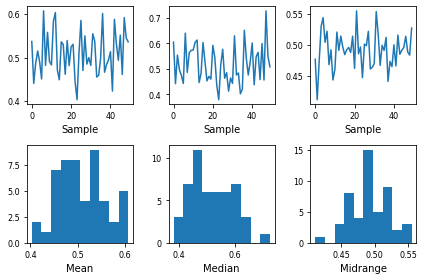

In [88]:
from pandas.plotting import bootstrap_plot
data = pd.Series(np.random.rand(1000))
bootstrap_plot(data, size=20, samples=50);

In [154]:
s = set([1, 3])
lst = [1, 5]
s.update(lst)
s

{1, 3, 5}

In [2]:
df= sns.load_dataset('taxis')
df.sample(10)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5140,2019-03-04 19:57:14,2019-03-04 20:02:27,1,1.02,5.5,1.96,0.0,11.76,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
1980,2019-03-06 20:59:57,2019-03-06 21:19:00,1,3.53,15.0,3.76,0.0,22.56,yellow,credit card,Times Sq/Theatre District,Long Island City/Hunters Point,Manhattan,Queens
3155,2019-03-07 17:56:18,2019-03-07 18:10:01,3,1.79,10.0,0.00,0.0,14.30,yellow,cash,Little Italy/NoLiTa,Murray Hill,Manhattan,Manhattan
1135,2019-03-26 22:43:51,2019-03-26 22:50:28,1,1.03,6.5,2.06,0.0,12.36,yellow,credit card,SoHo,Greenwich Village North,Manhattan,Manhattan
4937,2019-03-02 19:50:23,2019-03-02 20:04:19,2,1.60,10.0,2.75,0.0,16.55,yellow,credit card,TriBeCa/Civic Center,East Village,Manhattan,Manhattan
752,2019-03-14 18:05:49,2019-03-14 18:10:43,1,0.40,5.0,0.00,0.0,9.30,yellow,cash,Greenwich Village South,Little Italy/NoLiTa,Manhattan,Manhattan
4884,2019-03-06 08:49:58,2019-03-06 08:58:39,3,1.40,8.0,0.00,0.0,11.30,yellow,cash,Upper West Side South,Central Park,Manhattan,Manhattan
1484,2019-03-08 18:22:44,2019-03-08 18:27:26,1,0.88,5.5,0.00,0.0,9.80,yellow,cash,Upper West Side South,Upper West Side North,Manhattan,Manhattan
6390,2019-03-19 09:32:20,2019-03-19 09:36:22,1,0.70,5.0,0.00,0.0,5.80,green,cash,Morningside Heights,Central Harlem North,Manhattan,Manhattan
2296,2019-03-20 23:23:46,2019-03-20 23:27:54,1,0.40,4.5,1.65,0.0,9.95,yellow,credit card,Sutton Place/Turtle Bay North,Midtown Center,Manhattan,Manhattan


In [4]:
df.describe(include='all')

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433,6389,6407,6388,6407,6388
unique,6414,6425,NaN,NaN,NaN,NaN,NaN,NaN,2,2,194,203,4,5
top,2019-03-07 19:54:40,2019-03-22 11:06:48,NaN,NaN,NaN,NaN,NaN,NaN,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,2,2,NaN,NaN,NaN,NaN,NaN,NaN,5451,4577,230,245,5268,5206
mean,NaN,NaN,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,6423,6424,6425,6426,6427,6428,6429,6430,6431,6432
count,14,14,14,14,14,14,14,13,14,14,...,14,14,14,14,14.0,14,14.0,14,14,14
unique,13,11,13,13,13,13,13,10,12,12,...,12,12,12,13,12.0,13,13.0,12,12,13
top,Manhattan,Upper West Side South,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,0,Manhattan,Manhattan,...,Queens,Manhattan,Brooklyn,Manhattan,20.0,Manhattan,0.0,Brooklyn,Brooklyn,Brooklyn
freq,2,2,2,2,2,2,2,3,2,2,...,2,2,2,2,2.0,2,2.0,2,2,2


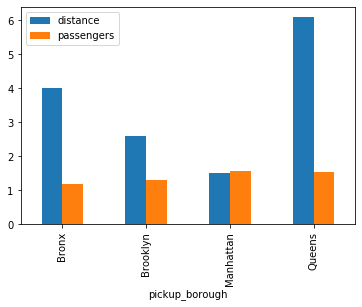

In [13]:
df.groupby('pickup_borough').agg({'distance': 'median', 'passengers': 'mean'}).plot.bar();

In [2]:
df = sns.load_dataset('taxis')
df.sample(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
4323,2019-03-28 16:12:28,2019-03-28 16:31:44,1,2.40,13.0,4.30,0.0,21.60,yellow,credit card,Flatiron,Seaport,Manhattan,Manhattan
309,2019-03-08 00:42:58,2019-03-08 00:53:48,2,3.67,12.0,3.16,0.0,18.96,yellow,credit card,East Village,Yorkville West,Manhattan,Manhattan
6066,2019-03-09 16:11:54,2019-03-09 16:25:18,2,4.45,15.0,0.00,0.0,15.80,green,cash,Elmhurst,North Corona,Queens,Queens
5622,2019-03-02 22:32:31,2019-03-02 22:41:00,1,1.44,7.5,0.00,0.0,8.80,green,cash,Hamilton Heights,Central Harlem North,Manhattan,Manhattan
1560,2019-03-28 08:26:59,2019-03-28 08:33:21,1,0.80,6.0,1.85,0.0,11.15,yellow,credit card,TriBeCa/Civic Center,SoHo,Manhattan,Manhattan


In [3]:
sns.set()

In [4]:
sns.histplot(df.distance);  # в новых версиях есть

AttributeError: module 'seaborn' has no attribute 'histplot'

In [10]:
sns.displot(df.distance);  # в новых версиях есть

AttributeError: module 'seaborn' has no attribute 'displot'

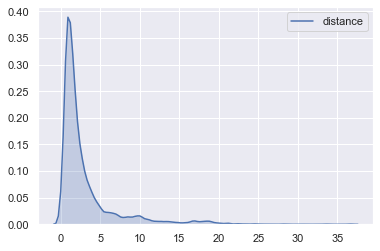

In [7]:
sns.kdeplot(df.distance, shade=True);

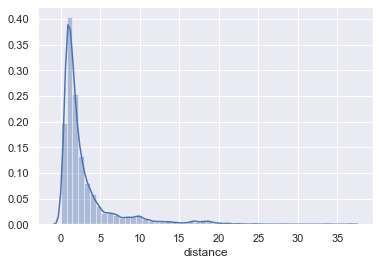

In [9]:
sns.distplot(df.distance);

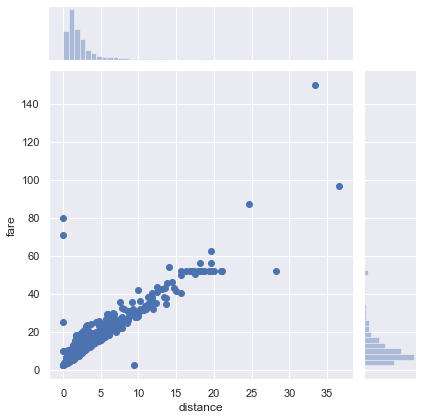

In [47]:
sns.jointplot(x="distance", y="fare", data=df.sample(1000), kind='scatter');
# "scatter" | "kde" | "hex" | "reg" | "resid" 

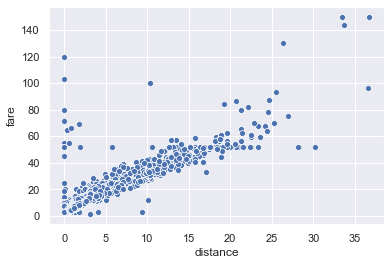

In [52]:
sns.scatterplot(data=df, x='distance', y='fare');

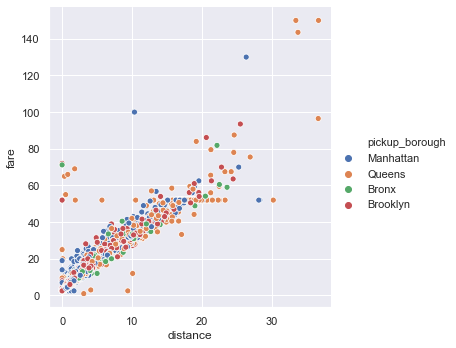

In [68]:
sns.relplot(data=df, x='distance', y='fare',hue='pickup_borough');

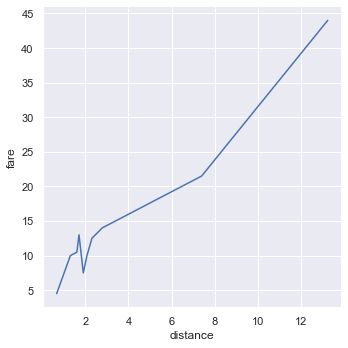

In [62]:
sns.relplot(data=df.sample(10), x='distance', y='fare', kind='line');

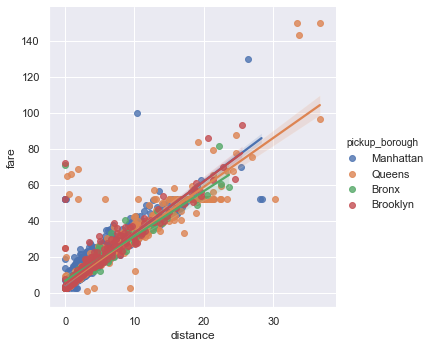

In [13]:
sns.lmplot(data=df, x='distance', y='fare', hue='pickup_borough');

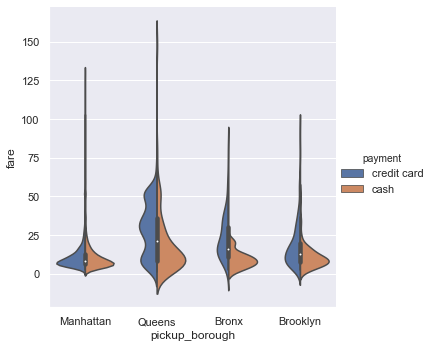

In [38]:
sns.catplot("pickup_borough", "fare", "payment", data=df, kind='violin', split=True);
# "point", "bar", "strip", "swarm", "box", "violin", or "boxen".sample(1100)

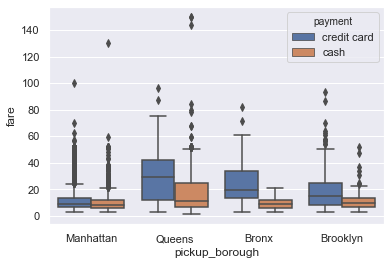

In [31]:
sns.boxplot("pickup_borough", "fare", "payment", data=df);

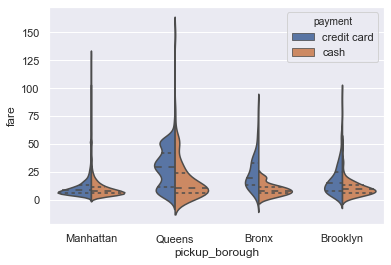

In [36]:
sns.violinplot(x="pickup_borough", y="fare", hue="payment", data=df, 
                       split=True, inner="quartile");

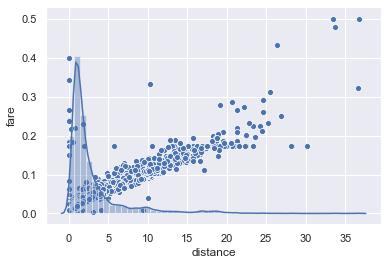

In [14]:
sns.distplot(df.distance)
sns.scatterplot(data=df, x='distance', y=df.fare / 300);

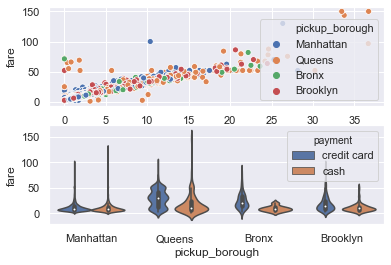

In [20]:
fig, ax = plt.subplots(2, 1)
sns.scatterplot(x='distance', y='fare',hue='pickup_borough', data=df, ax=ax[0])
sns.violinplot(x="pickup_borough", y="fare", hue="payment", data=df, ax=ax[1]);

In [11]:
df.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan


Occupation - род занятий?  
Marital_Status - семейное поожение  
Purchase - стоимость?  
Набор данных здесь представляет собой образец транзакций, совершенных в розничном магазине. Магазин хочет лучше знать покупательское поведение в отношении различных продуктов. В частности, здесь проблема представляет собой проблему регрессии, когда мы пытаемся предсказать зависимую переменную (сумму покупки) с помощью информации, содержащейся в других переменных.  
Проблема классификации также может быть решена в этом наборе данных, поскольку некоторые переменные являются категориальными, а некоторые другие подходы могут быть «прогнозированием возраста потребителя» или даже «прогнозированием категории купленных товаров». Этот набор данных также особенно удобен для кластеризации и, возможно, для поиска в нем различных кластеров потребителей.  

In [2]:
sns.set(style='whitegrid')

In [3]:
df = pd.read_csv('black_friday.csv')
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


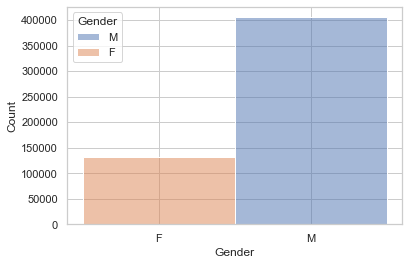

In [29]:
sns.histplot(data=df, x='Gender', hue='Gender', hue_order=['M', 'F']);

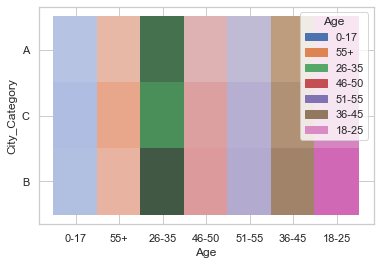

In [35]:
sns.histplot(data=df, x='Age', y='City_Category', hue='Age');

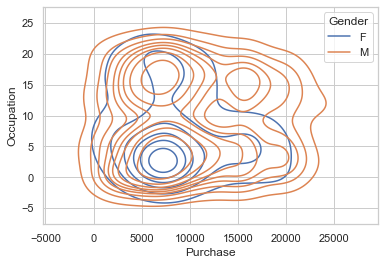

In [5]:
sns.kdeplot(data=df.sample(1000), x='Purchase', y='Occupation', hue='Gender');

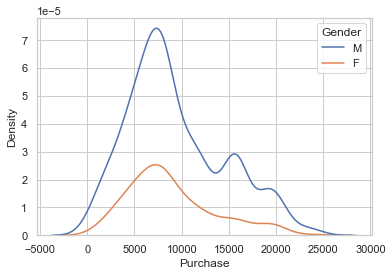

In [6]:
sns.kdeplot(data=df.sample(1000), x='Purchase', hue='Gender');

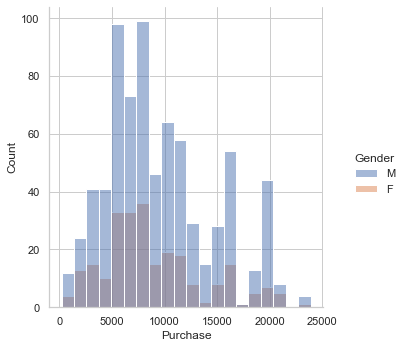

In [14]:
sns.displot(data=df.sample(1000), x='Purchase', hue='Gender', kind='kde', hue_order=['M', 'F']);

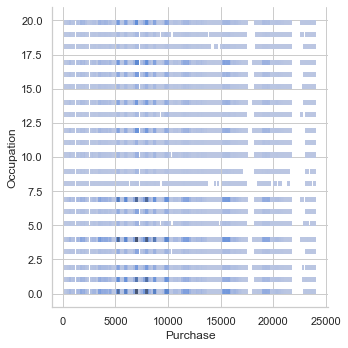

In [13]:
sns.displot(data=df, x='Purchase', y='Occupation', kind="hist");

In [15]:
df = pd.read_csv('black_friday.csv')
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
df['Occupation'][df['Product_Category_1'] == 12] = df['Occupation'] - df['Product_Category_2']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10.0,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,NaN,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,-4.0,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16.0,C,4+,0,8,NaN,NaN,7969


In [16]:
df[df['Product_Category_1'] == 12]['Occupation'] = df['Occupation'] - df['Product_Category_2']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [18]:
# почему столбик-фильтр работает, а наоборот - нет!?

In [23]:
df[df['Product_Category_1'] == 12]['Occupation'] = 999
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [26]:
df['Occupation'][df['Product_Category_1'] == 12] = 999
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,999,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,999,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [58]:
data = pd.read_json('https://httpbin.org/json')
data

,slideshow
author,Yours Truly
date,date of publication
slides,"[{'title': 'Wake up to WonderWidgets!', 'type'..."
title,Sample Slide Show


In [59]:
test = pd.DataFrame(data['slideshow']['slides'])
test

,title,type,items
0,Wake up to WonderWidgets!,all,NaN
1,Overview,all,"[Why <em>WonderWidgets</em> are great, Who <em..."


In [29]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo'
data = pd.read_json(url)  #, lines=True, nrows=10
data.head(10)

,Meta Data,Time Series (5min)
1. Information,"Intraday (5min) open, high, low, close prices ...",NaN
2. Symbol,IBM,NaN
3. Last Refreshed,2022-11-11 19:20:00,NaN
4. Interval,5min,NaN
5. Output Size,Compact,NaN
6. Time Zone,US/Eastern,NaN
2022-11-11 19:20:00,NaN,"{'1. open': '143.2400', '2. high': '143.2400',..."
2022-11-11 19:10:00,NaN,"{'1. open': '143.2000', '2. high': '143.2000',..."
2022-11-11 18:50:00,NaN,"{'1. open': '143.1000', '2. high': '143.1000',..."
2022-11-11 18:45:00,NaN,"{'1. open': '143.1000', '2. high': '143.1000',..."


In [30]:
data = data['Time Series (5min)'][6:]
data

2022-11-11 19:20:00    {'1. open': '143.2400', '2. high': '143.2400',...
2022-11-11 19:10:00    {'1. open': '143.2000', '2. high': '143.2000',...
2022-11-11 18:50:00    {'1. open': '143.1000', '2. high': '143.1000',...
2022-11-11 18:45:00    {'1. open': '143.1000', '2. high': '143.1000',...
2022-11-11 18:20:00    {'1. open': '142.8900', '2. high': '142.8900',...
                                             ...                        
2022-11-10 19:10:00    {'1. open': '141.2300', '2. high': '141.2300',...
2022-11-10 18:55:00    {'1. open': '141.3000', '2. high': '141.3000',...
2022-11-10 18:50:00    {'1. open': '141.3000', '2. high': '141.3000',...
2022-11-10 16:50:00    {'1. open': '141.4500', '2. high': '141.5000',...
2022-11-10 16:45:00    {'1. open': '141.2300', '2. high': '141.2500',...
Name: Time Series (5min), Length: 100, dtype: object

In [31]:
test = pd.DataFrame(data)
test

,Time Series (5min)
2022-11-11 19:20:00,"{'1. open': '143.2400', '2. high': '143.2400',..."
2022-11-11 19:10:00,"{'1. open': '143.2000', '2. high': '143.2000',..."
2022-11-11 18:50:00,"{'1. open': '143.1000', '2. high': '143.1000',..."
2022-11-11 18:45:00,"{'1. open': '143.1000', '2. high': '143.1000',..."
2022-11-11 18:20:00,"{'1. open': '142.8900', '2. high': '142.8900',..."
...,...
2022-11-10 19:10:00,"{'1. open': '141.2300', '2. high': '141.2300',..."
2022-11-10 18:55:00,"{'1. open': '141.3000', '2. high': '141.3000',..."
2022-11-10 18:50:00,"{'1. open': '141.3000', '2. high': '141.3000',..."
2022-11-10 16:50:00,"{'1. open': '141.4500', '2. high': '141.5000',..."


In [54]:
import requests
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo'
r = requests.get(url)
data = r.json()
data

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
  '2. Symbol': 'IBM',
  '3. Last Refreshed': '2022-11-11 19:20:00',
  '4. Interval': '5min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (5min)': {'2022-11-11 19:20:00': {'1. open': '143.2400',
   '2. high': '143.2400',
   '3. low': '143.2400',
   '4. close': '143.2400',
   '5. volume': '106'},
  '2022-11-11 19:10:00': {'1. open': '143.2000',
   '2. high': '143.2000',
   '3. low': '143.2000',
   '4. close': '143.2000',
   '5. volume': '200'},
  '2022-11-11 18:50:00': {'1. open': '143.1000',
   '2. high': '143.1000',
   '3. low': '143.1000',
   '4. close': '143.1000',
   '5. volume': '146'},
  '2022-11-11 18:45:00': {'1. open': '143.1000',
   '2. high': '143.1000',
   '3. low': '143.1000',
   '4. close': '143.1000',
   '5. volume': '700'},
  '2022-11-11 18:20:00': {'1. open': '142.8900',
   '2. high': '142.8900',
   '3. low': '142.8900',
   '4. close': '142.8900

In [55]:
data['Time Series (5min)']

{'2022-11-11 19:20:00': {'1. open': '143.2400',
  '2. high': '143.2400',
  '3. low': '143.2400',
  '4. close': '143.2400',
  '5. volume': '106'},
 '2022-11-11 19:10:00': {'1. open': '143.2000',
  '2. high': '143.2000',
  '3. low': '143.2000',
  '4. close': '143.2000',
  '5. volume': '200'},
 '2022-11-11 18:50:00': {'1. open': '143.1000',
  '2. high': '143.1000',
  '3. low': '143.1000',
  '4. close': '143.1000',
  '5. volume': '146'},
 '2022-11-11 18:45:00': {'1. open': '143.1000',
  '2. high': '143.1000',
  '3. low': '143.1000',
  '4. close': '143.1000',
  '5. volume': '700'},
 '2022-11-11 18:20:00': {'1. open': '142.8900',
  '2. high': '142.8900',
  '3. low': '142.8900',
  '4. close': '142.8900',
  '5. volume': '300'},
 '2022-11-11 17:05:00': {'1. open': '143.1700',
  '2. high': '143.1700',
  '3. low': '143.1700',
  '4. close': '143.1700',
  '5. volume': '105'},
 '2022-11-11 17:00:00': {'1. open': '143.1700',
  '2. high': '143.1700',
  '3. low': '143.1700',
  '4. close': '143.1700',
 

In [57]:
test = pd.DataFrame(data['Time Series (5min)']).T
test

,1. open,2. high,3. low,4. close,5. volume
2022-11-11 19:20:00,143.2400,143.2400,143.2400,143.2400,106
2022-11-11 19:10:00,143.2000,143.2000,143.2000,143.2000,200
2022-11-11 18:50:00,143.1000,143.1000,143.1000,143.1000,146
2022-11-11 18:45:00,143.1000,143.1000,143.1000,143.1000,700
2022-11-11 18:20:00,142.8900,142.8900,142.8900,142.8900,300
...,...,...,...,...,...
2022-11-10 19:10:00,141.2300,141.2300,141.2300,141.2300,1500
2022-11-10 18:55:00,141.3000,141.3000,141.3000,141.3000,105
2022-11-10 18:50:00,141.3000,141.3000,141.3000,141.3000,500
2022-11-10 16:50:00,141.4500,141.5000,141.4500,141.4600,1000


In [5]:
df = sns.load_dataset('taxis')
df.sample(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
1314,2019-03-08 23:08:02,2019-03-08 23:19:42,1,1.76,9.5,2.66,0.0,15.96,yellow,credit card,Union Sq,East Village,Manhattan,Manhattan
452,2019-03-11 22:41:38,2019-03-11 22:50:06,2,1.32,7.5,0.00,0.0,11.30,yellow,cash,Clinton East,Midtown South,Manhattan,Manhattan
705,2019-03-17 21:21:53,2019-03-17 21:27:29,1,0.76,6.0,1.96,0.0,11.76,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
3104,2019-03-03 08:52:15,2019-03-03 08:54:35,1,0.82,4.5,1.00,0.0,8.80,yellow,credit card,Sutton Place/Turtle Bay North,Lenox Hill West,Manhattan,Manhattan
1691,2019-03-13 17:22:08,2019-03-13 17:34:08,1,3.10,12.0,0.00,0.0,16.30,yellow,cash,Upper West Side South,East Harlem North,Manhattan,Manhattan


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


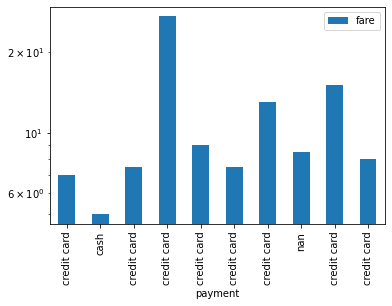

In [23]:
df[:10].plot.bar(x='payment', y='fare', logy=True);

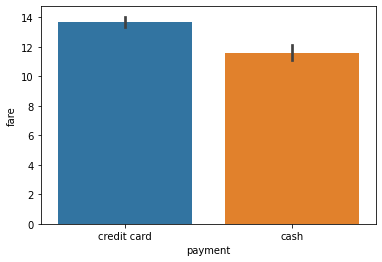

In [27]:
# 
sns.barplot(x='payment', y='fare', data=df);

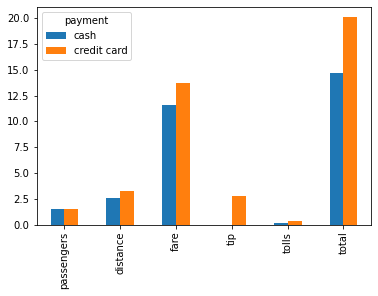

In [22]:
df.groupby('payment').agg('mean').T.plot.bar();

In [3]:
table = pd.ExcelFile('пример.xlsx')

In [7]:
df1 = pd.read_excel(table, 'laptop')
df1

,code,model,speed,ram,hd,price,screen
0,1,1298,350,32,4,700.0,11
1,2,1321,500,64,8,970.0,12
2,3,1750,750,128,12,1200.0,14
3,4,1298,600,64,10,1050.0,15
4,5,1752,750,128,10,1150.0,14
5,6,1298,450,64,10,950.0,12


In [8]:
df2 = pd.read_excel(table, 'Лист1')
df2

,code,model,speed,ram,hd,price,screen
0,7,1298,350,32,4,700.0,11
1,8,1321,500,64,8,970.0,12
2,9,1750,750,128,12,1200.0,14
3,10,1298,600,64,10,1050.0,15
4,11,1752,750,128,10,1150.0,14
5,12,1298,450,64,10,950.0,12


In [10]:
pd.concat([df1, df2])

,code,model,speed,ram,hd,price,screen
0,1,1298,350,32,4,700.0,11
1,2,1321,500,64,8,970.0,12
2,3,1750,750,128,12,1200.0,14
3,4,1298,600,64,10,1050.0,15
4,5,1752,750,128,10,1150.0,14
5,6,1298,450,64,10,950.0,12
0,7,1298,350,32,4,700.0,11
1,8,1321,500,64,8,970.0,12
2,9,1750,750,128,12,1200.0,14
3,10,1298,600,64,10,1050.0,15


In [11]:
df3 = pd.read_excel(table, 'Лист2')
df3

,code,guarante
0,1,1
1,2,2
2,3,1
3,4,2
4,5,2
5,6,1


In [12]:
pd.merge(df1, df3)

,code,model,speed,ram,hd,price,screen,guarante
0,1,1298,350,32,4,700.0,11,1
1,2,1321,500,64,8,970.0,12,2
2,3,1750,750,128,12,1200.0,14,1
3,4,1298,600,64,10,1050.0,15,2
4,5,1752,750,128,10,1150.0,14,2
5,6,1298,450,64,10,950.0,12,1


### Travel Dataset - Datathon 2019

In [2]:
flights = pd.read_csv('./Travel Dataset - Datathon 2019/flights.csv')

In [3]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [6]:
flights.date = pd.to_datetime(flights.date)

In [8]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10


In [9]:
hotels = pd.read_csv('./Travel Dataset - Datathon 2019/hotels.csv')
hotels.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [10]:
hotels.date = pd.to_datetime(hotels.date)

In [11]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   travelCode  40552 non-null  int64         
 1   userCode    40552 non-null  int64         
 2   name        40552 non-null  object        
 3   place       40552 non-null  object        
 4   days        40552 non-null  int64         
 5   price       40552 non-null  float64       
 6   total       40552 non-null  float64       
 7   date        40552 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.5+ MB


In [14]:
users = pd.read_csv('./Travel Dataset - Datathon 2019/users.csv')
users.head(5)

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [4]:
import sqlite3

In [25]:
cnx = sqlite3.connect('travel_dataset.db')

In [26]:
flights.to_sql(name='flights', con=cnx)

In [27]:
pd.read_sql('select * from flights limit 5', cnx)

,index,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26 00:00:00
1,1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30 00:00:00
2,2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03 00:00:00
3,3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04 00:00:00
4,4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10 00:00:00


In [28]:
hotels.to_sql(name='hotels', con=cnx)

In [29]:
# приджойним
pd.read_sql('select * from hotels join flights using(travelCode) limit 5', cnx)

,index,travelCode,userCode,name,place,days,price,total,date,index,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26 00:00:00,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26 00:00:00
1,0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26 00:00:00,1,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30 00:00:00
2,1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,2019-10-10 00:00:00,4,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10 00:00:00
3,1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,2019-10-10 00:00:00,5,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,2019-10-12 00:00:00
4,2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,2019-11-14 00:00:00,14,0,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,2019-11-14 00:00:00


In [31]:
users.to_sql(name='users', con=cnx)

ValueError: Table 'users' already exists.

In [33]:
pd.read_sql(
        '''select * 
        from hotels join flights using(travelCode) 
                    join users on flights.userCode = users.code
        limit 5''', cnx)

,index,travelCode,userCode,name,place,days,price,total,date,index,...,time,distance,agency,date,index,code,company,name,gender,age
0,0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26 00:00:00,0,...,1.76,676.53,FlyingDrops,2019-09-26 00:00:00,0,0,4You,Roy Braun,male,21
1,0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26 00:00:00,1,...,1.76,676.53,FlyingDrops,2019-09-30 00:00:00,0,0,4You,Roy Braun,male,21
2,1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,2019-10-10 00:00:00,4,...,2.16,830.86,CloudFy,2019-10-10 00:00:00,0,0,4You,Roy Braun,male,21
3,1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,2019-10-10 00:00:00,5,...,2.16,830.86,CloudFy,2019-10-12 00:00:00,0,0,4You,Roy Braun,male,21
4,2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,2019-11-14 00:00:00,14,...,2.16,830.86,CloudFy,2019-11-14 00:00:00,0,0,4You,Roy Braun,male,21


In [34]:
cnx.close()

In [5]:
cnx = sqlite3.connect('travel_dataset.db')

In [6]:
pd.read_sql(
        '''select * 
        from hotels join flights using(travelCode) 
                    join users on flights.userCode = users.code
        limit 5''', cnx)

,index,travelCode,userCode,name,place,days,price,total,date,index,userCode,from,to,flightType,price,time,distance,agency,date,index,code,company,name,gender,age
0,0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26 00:00:00,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26 00:00:00,0,0,4You,Roy Braun,male,21
1,0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26 00:00:00,1,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30 00:00:00,0,0,4You,Roy Braun,male,21
2,1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,2019-10-10 00:00:00,4,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10 00:00:00,0,0,4You,Roy Braun,male,21
3,1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,2019-10-10 00:00:00,5,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,2019-10-12 00:00:00,0,0,4You,Roy Braun,male,21
4,2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,2019-11-14 00:00:00,14,0,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,2019-11-14 00:00:00,0,0,4You,Roy Braun,male,21


In [7]:
cnx.close()

In [8]:
flights = pd.read_csv('./Travel Dataset - Datathon 2019/flights.csv')
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [9]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [10]:
flights.date = pd.to_datetime(flights.date)

In [11]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10


In [12]:
hotels = pd.read_csv('./Travel Dataset - Datathon 2019/hotels.csv')
hotels.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [13]:
hotels.date = pd.to_datetime(hotels.date)

In [14]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   travelCode  40552 non-null  int64         
 1   userCode    40552 non-null  int64         
 2   name        40552 non-null  object        
 3   place       40552 non-null  object        
 4   days        40552 non-null  int64         
 5   price       40552 non-null  float64       
 6   total       40552 non-null  float64       
 7   date        40552 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.5+ MB


In [15]:
users = pd.read_csv('./Travel Dataset - Datathon 2019/users.csv')
users.head(5)

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [17]:
flights.describe()

,travelCode,userCode,price,time,distance
count,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000
mean,67971.500000,667.505495,957.37503,1.421147,546.955535
std,39243.724665,389.523127,362.31189,0.542541,208.851288
min,0.000000,0.000000,301.51000,0.440000,168.220000
25%,33985.750000,326.000000,672.66000,1.040000,401.660000
50%,67971.500000,659.000000,904.00000,1.460000,562.140000
75%,101957.250000,1011.000000,1222.24000,1.760000,676.530000
max,135943.000000,1339.000000,1754.17000,2.440000,937.770000


In [42]:
flights.describe(include='datetime64[ns]', datetime_is_numeric=True)

,date
count,271888
mean,2021-01-11 05:25:56.052492032
min,2019-09-26 00:00:00
25%,2020-04-02 00:00:00
50%,2020-11-14 00:00:00
75%,2021-09-09 00:00:00
max,2023-07-24 00:00:00


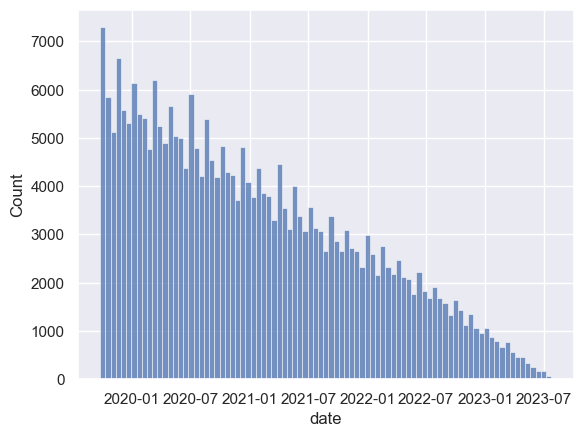

In [44]:
sns.histplot(flights.date);

In [29]:
flights.describe(include='object')

,from,to,flightType,agency
count,271888,271888,271888,271888
unique,9,9,3,3
top,Florianopolis (SC),Florianopolis (SC),firstClass,Rainbow
freq,57317,57317,116418,116752


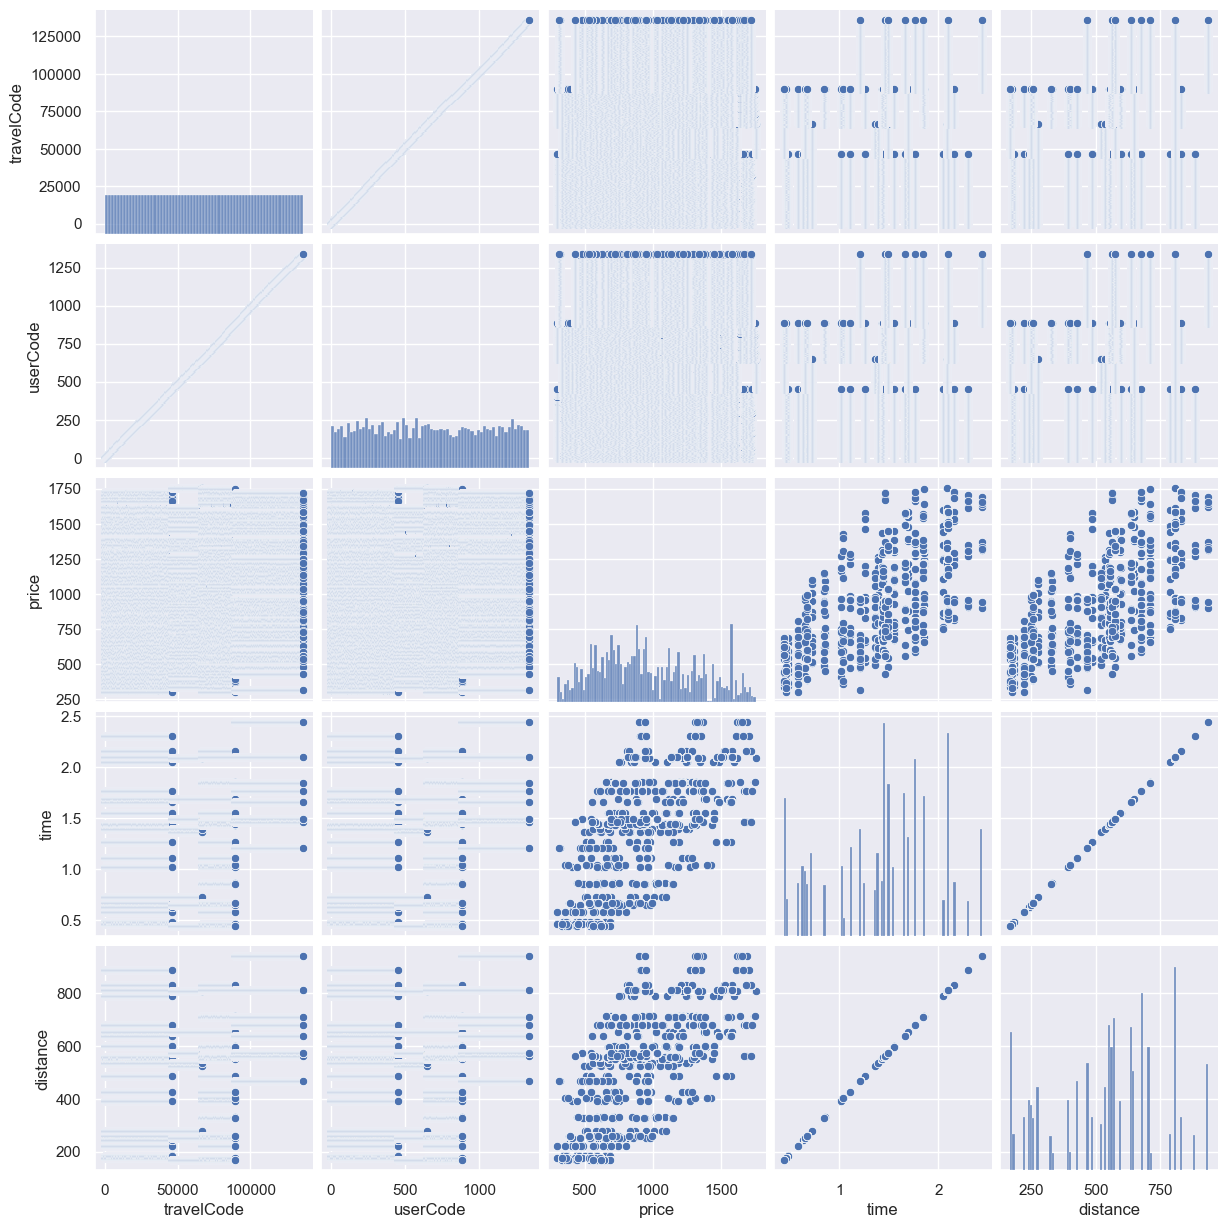

In [28]:
sns.pairplot(flights);

In [30]:
hotels.describe()

,travelCode,userCode,days,price,total
count,40552.000000,40552.000000,40552.000000,40552.000000,40552.000000
mean,67911.794461,666.963726,2.499679,214.439554,536.229513
std,39408.199333,391.136794,1.119326,76.742305,319.331482
min,0.000000,0.000000,1.000000,60.390000,60.390000
25%,33696.750000,323.000000,1.000000,165.990000,247.620000
50%,67831.000000,658.000000,2.000000,242.880000,495.240000
75%,102211.250000,1013.000000,4.000000,263.410000,742.860000
max,135942.000000,1339.000000,4.000000,313.020000,1252.080000


In [32]:
hotels.describe(include='object')

,name,place
count,40552,40552
unique,9,9
top,Hotel K,Salvador (BH)
freq,5094,5094


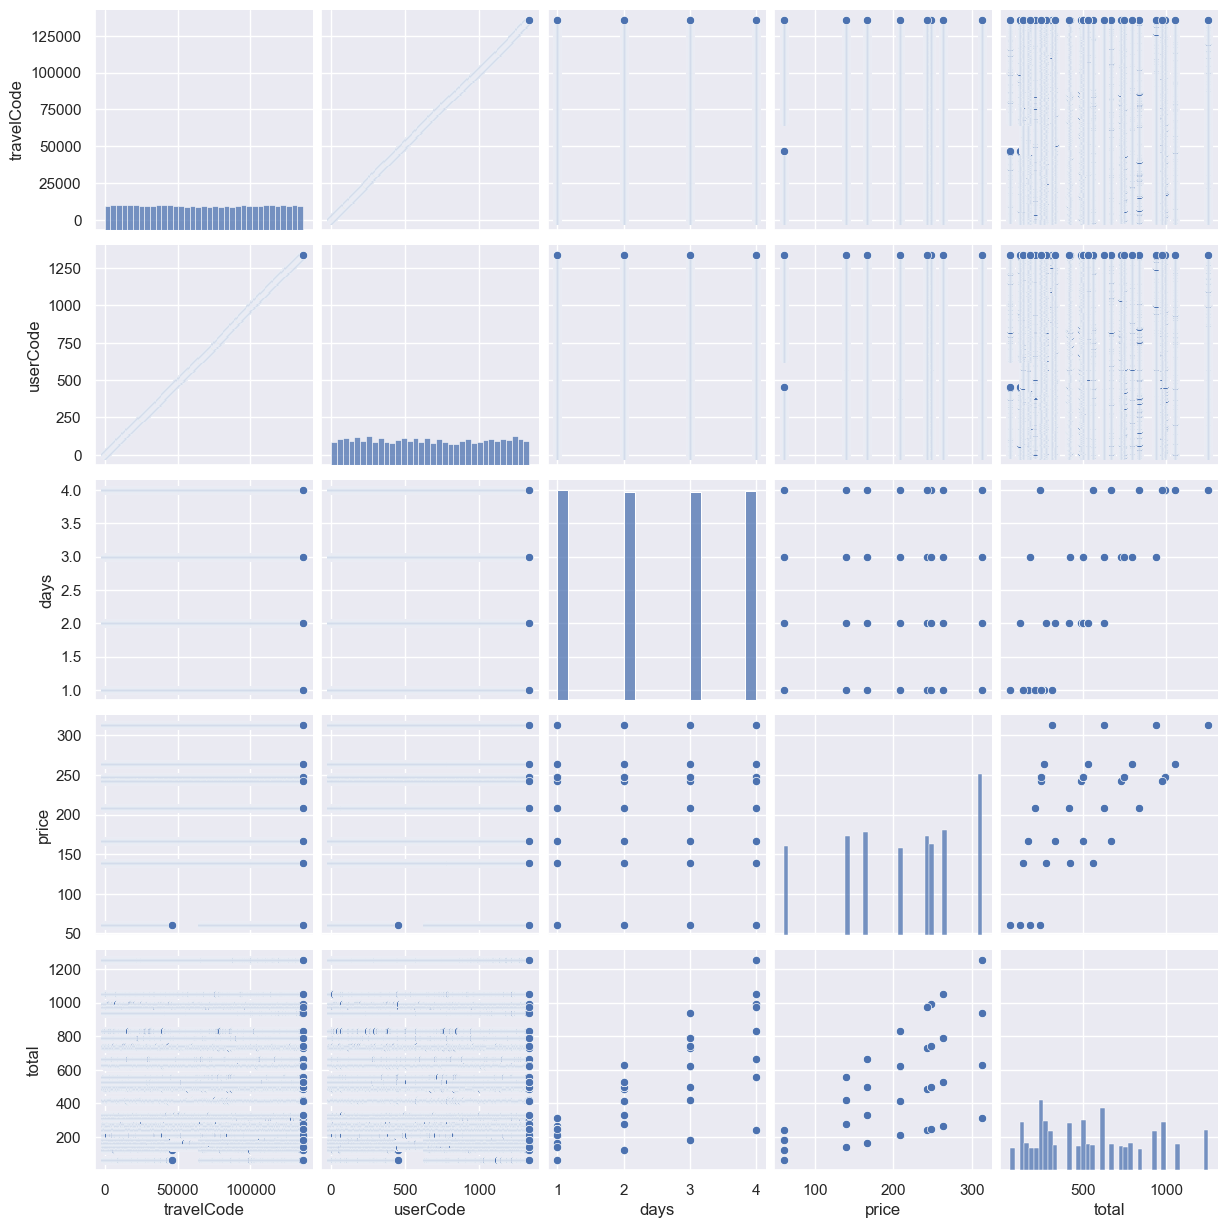

In [33]:
sns.pairplot(hotels)

In [34]:
users.describe()

,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


In [35]:
users.describe(include='object')

,company,name,gender
count,1340,1340,1340
unique,5,1338,3
top,4You,Charlotte Johnson,male
freq,453,2,452


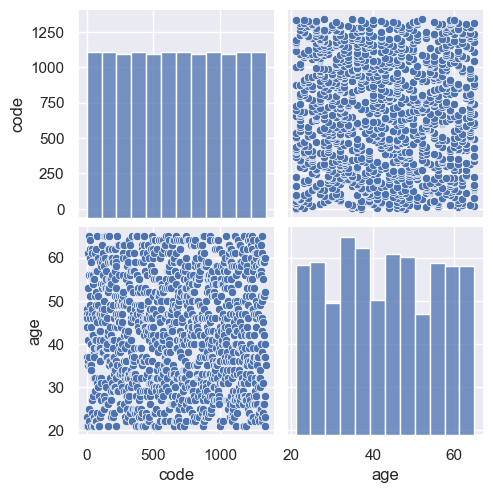

In [36]:
sns.pairplot(users);

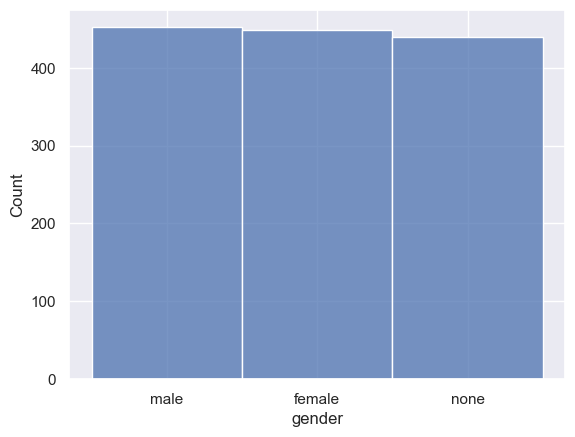

In [39]:
sns.histplot(users.gender);

Что ж так ровненько-то? Так и есть. Данные синтезированы

### About Dataset

https://www.kaggle.com/datasets/rajeshrampure/black-friday-sale

#### Dataset History
A retail company “ABC Private Limited” wants to understand the customer purchase behavior (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city type, stayincurrentcity), product details (productid and product category), and Total purchase amount from last month.  
Now, they want to build a model to predict the purchase amount of customers against various products which will help them to create a personalized offer for customers against different products.

Tasks to perform  
The purchase col column is the Target Variable, perform Univariate Analysis and Bivariate Analysis w.r.t the Purchase.

Masked in the column description means already converted from categorical value to numerical column.

Below mentioned points are just given to get you started with the dataset, not mandatory to follow the same sequence.

#### DATA PREPROCESSING
Check basic statistics of the dataset  
Check for missing values in the data  
Check for unique values in data  

#### Perform EDA
Purchase Distribution  
Check for outliers  
Analysis by Gender, Marital Status, occupation, occupation vs purchase, purchase by city, purchase by age group, etc  
Drop unnecessary fields  
Convert categorical data into integer using map function (e.g 'Gender' column)  
Missing value treatment  
Rename columns  
Fill nan values  
Map range variables into integers (e.g 'Age' column)  

#### Data Visualisation

visualize an individual column  
Age vs Purchased  
Occupation vs Purchased  
Productcategory1 vs Purchased  
Productcategory2 vs Purchased  
Productcategory3 vs Purchased  
City category pie chart  
Check for more possible plots  

All the Best!!

#### Variable - Definition
User_ID - User ID  
Product_ID - Product ID  
Gender - Sex of User  
Age - Age in bins  
Occupation - Occupation (Masked)  
City_Category - Category of the City (A, B, C)  
Stay_In_Current_City_Years - Number of years stay in current city  
Marital_Status - Marital Status  
Product_Category_1 - Product Category (Masked)  
Product_Category_2 - Product may belong to other categories also (Masked)  
Product_Category_3 - Product may belong to other categories also (Masked)  
Purchase - Purchase Amount (Target Variable)

In [3]:
df = pd.read_csv('black_friday_sale.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


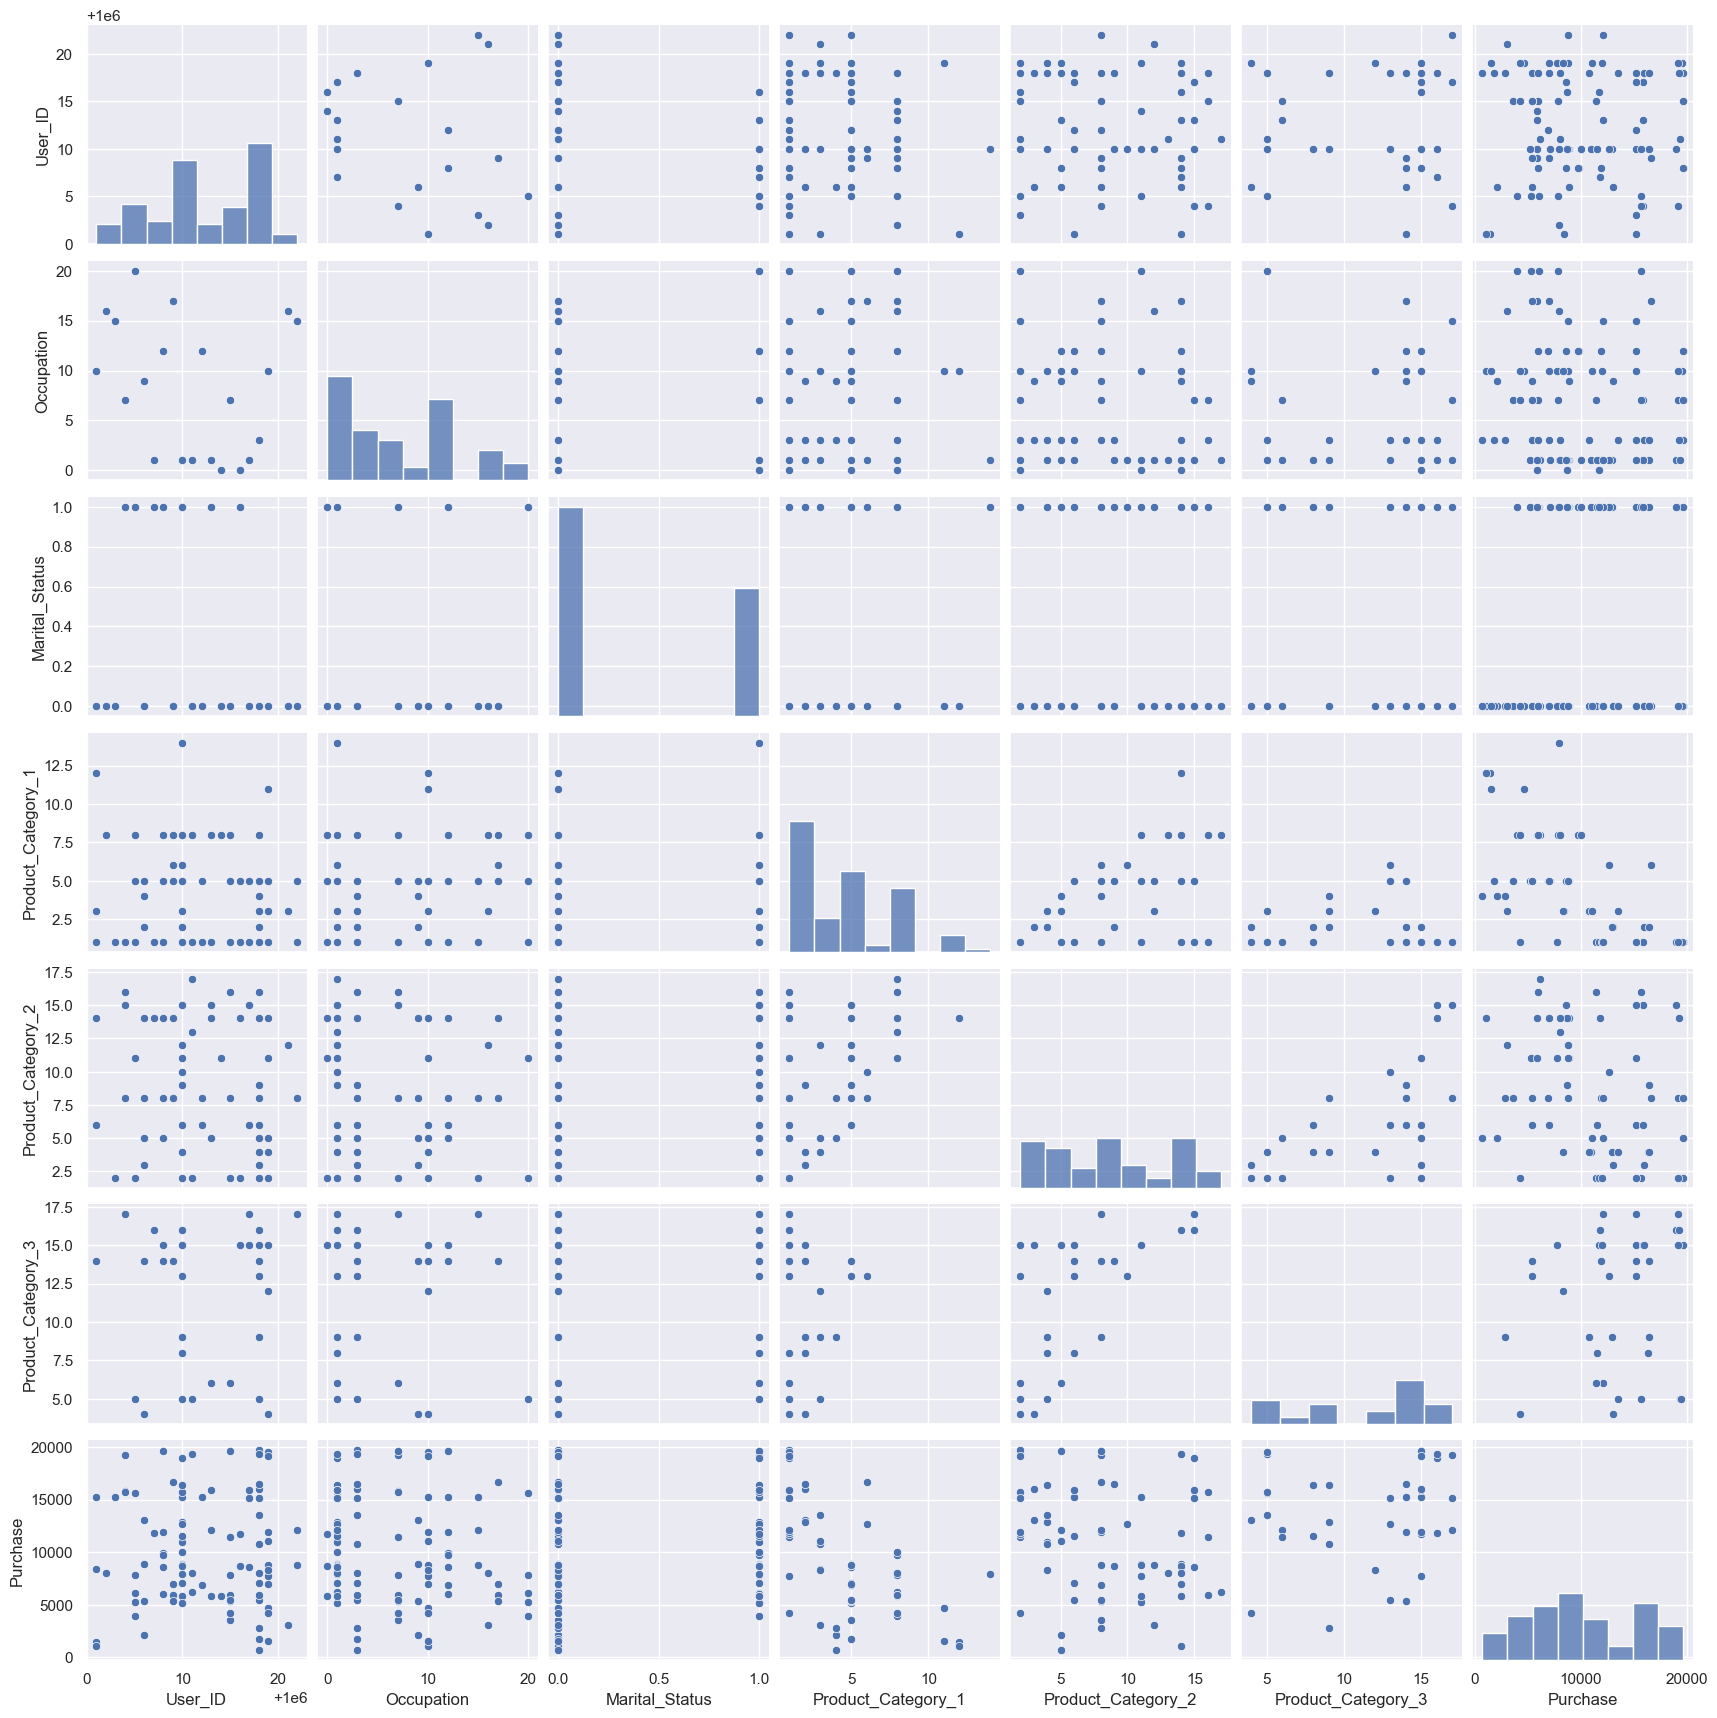

In [12]:
sns.pairplot(df.iloc[:100]);